**Jacqueline Bumler, Leonardo Bocchi**

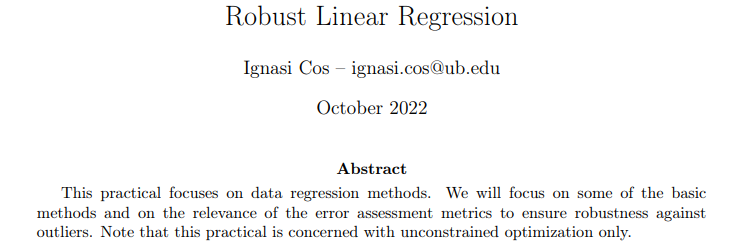

# **Ex.1 - Introduction**

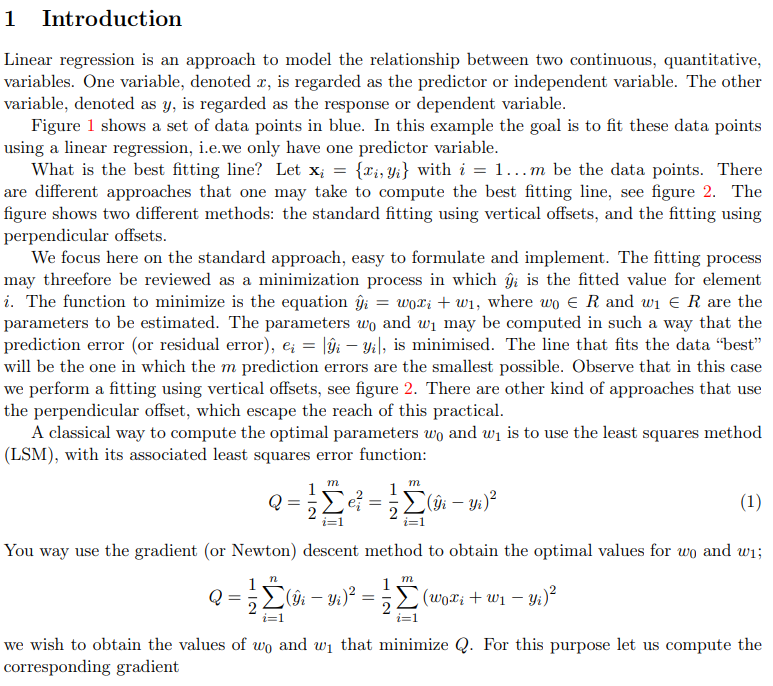

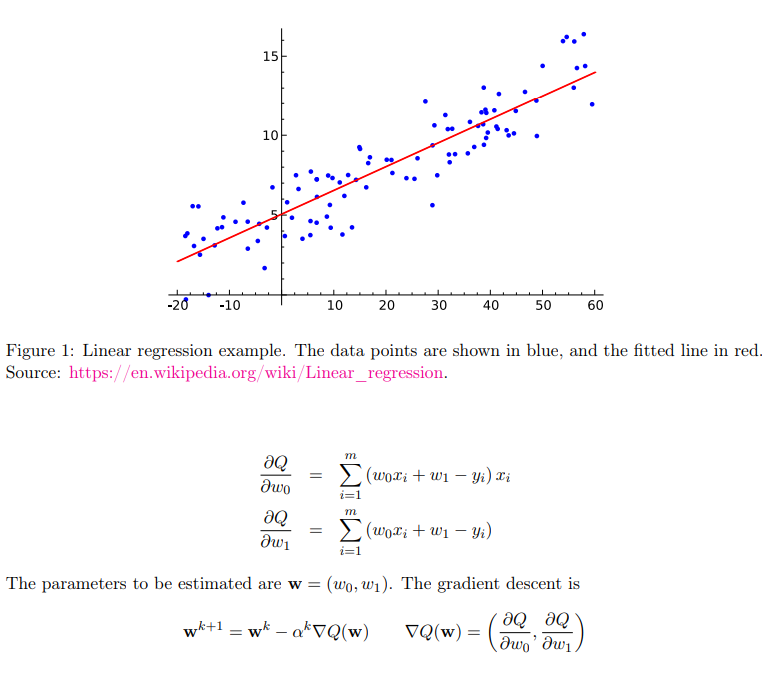

## Introduction - part 1

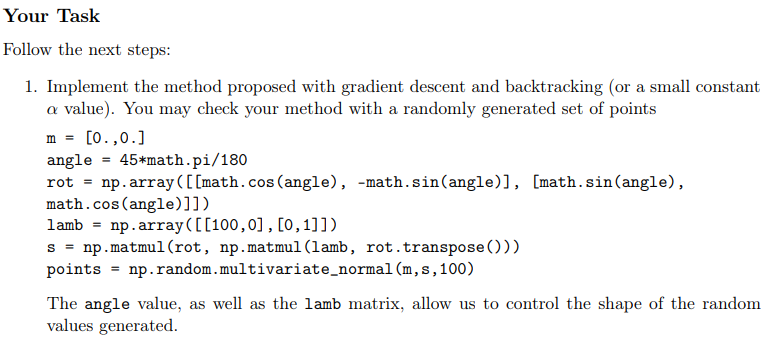

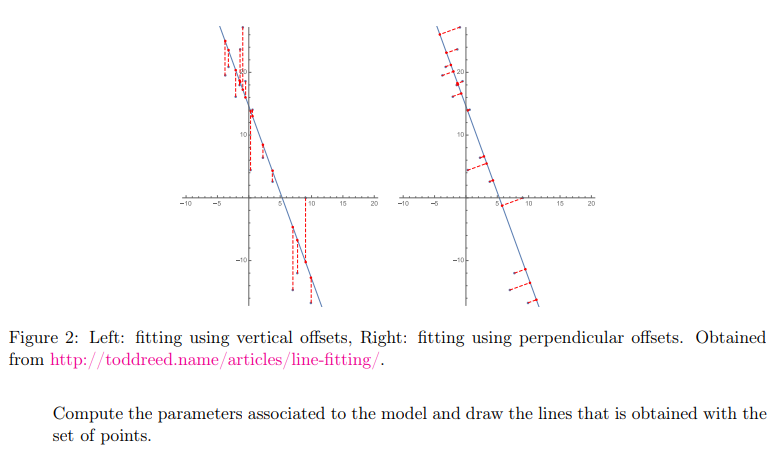

Text(0.5, 1.0, 'Dataset: linearly generated point cloud w/ noise')

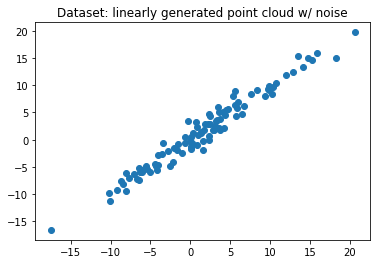

In [1]:
import numpy as np
import matplotlib.pyplot as plt

m = [0.,0.]
angle = 45*np.pi/180
rot = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle),
np.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
np.random.seed(536)    # Added for reproducibility
points = np.random.multivariate_normal(m,s,100)

xo = np.zeros(points.shape[0])
yo = np.zeros(points.shape[0])
for i in range(0, len(points)):
  xo[i] = points[i][0]
  yo[i] = points[i][1]

xo = xo.reshape([100,1])      # Make sure they are column vectors 
yo = yo.reshape([100,1])

plt.scatter(xo, yo)
plt.title("Dataset: linearly generated point cloud w/ noise")

In the following section we generate different dataset with different number of outliers. This is done now for uniformity of notation in the notebook

In this first part we generate the outliers only on one side of the distribution. We do this in order to observe how they gradually affect the regression. In the second part we will use random noise, as it is normally done, in order to generate the outliers. They are two different approaches, but they are both valid for this study, since an outlier is not uniquely defined/described by a set of requirements

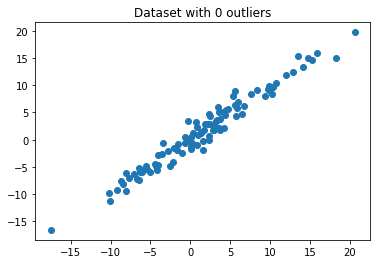

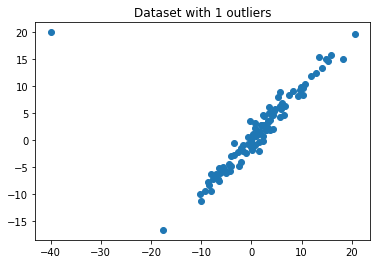

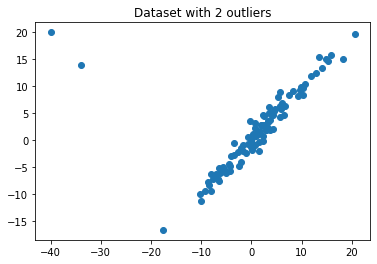

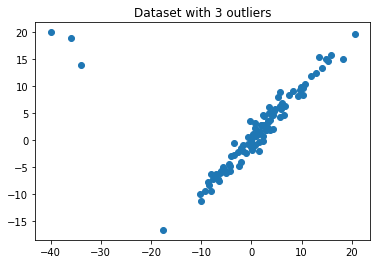

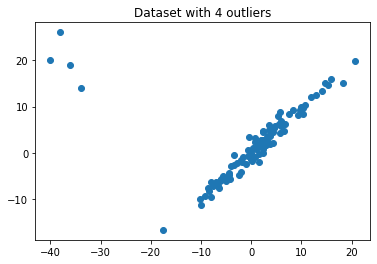

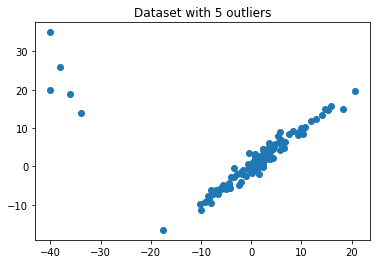

In [2]:
# Generate more outliers in the dataset ----------------------------------------
N = 5                         # Number of points changed to outliers 
n = int(len(xo)/(N+1))             

X = np.zeros([len(xo),N+1])      # Initiate matrices to store the values of the dataset for different numbers of outliers
Y = np.zeros([len(yo),N+1])      # The j-th column will correspond to the coordinates of the dateset with i outliers

for j in range(0, N+1):
  X[:,[j]] = xo            # The current dataset 
  Y[:,[j]] = yo

X[1,1] = -40         # The dataset with one outlier
Y[1,1] = 20

for j in range(2, N+1):       # The other datasets that will be used, with up to N outliers
  X[:,[j]] = X[:,[j-1]]       # Copy of the dataset with j-1 outliers
  Y[:,[j]] = Y[:,[j-1]]
  X[j*n,[j]] = -30 - 2*j      # Add one outlier
  Y[j*n,[j]] = 10 + (j**2) 

for j in range(0, N+1):
  plt.figure()
  plt.scatter(X[:,[j]], Y[:,[j]])
  plt.title("Dataset with " + str(j) + " outliers")

In [3]:
# Defining the loss function, in this case mean squared errors -----------------
def Q(w, x, y):
  return 1/2*(np.sum((w[0]*x + w[1]*np.ones([len(x),1]) - y)**2))

# Defining the gradient of the function to minimize (loss function) ------------
def gradient_Q(w, x, y):
  res = np.zeros([2,1])
  res[0] = np.dot(x.T, w[0]*x + w[1]*np.ones([len(x),1]) - y)
  res[1] = np.sum(w[0]*x + w[1]*np.ones([len(x),1]) - y)
  return res 

In [4]:
# Define the gradient descent method -------------------------------------------
def grad_des_LSE(x, y, w0=None, tol=1e-5):     # Defining a gradient descent method with a non-constant step size
  """ Gradient descent method
  Direction of descent: steepest, alpha: adjusted
  Returns xk (2xk+1), k (number of iterations)
  """
  import numpy as np

  if w0 == None:        # Initialize the weigths as random ones if not given
    np.random.seed(536)
    w0 = np.random.randn(2).reshape([2,1])

  wk = np.zeros([2,1])
  wk[:,[0]] = w0        
  k = 0

  grad = gradient_Q(wk[:,[k]], x, y)    # First iteration of the method (used in order not to have issues with entering the while loop on the first iteration)
  alpha = 1                       # Initial value of alpha
  wk = np.append(wk, wk[:,[k]] - alpha*grad, axis=1)
  while Q(wk[:,[k+1]], x, y) > Q(wk[:,[k]], x, y):        # Backtracking
    alpha = alpha/2           # Update alpha
    wk[:,[k+1]] = wk[:,[k]] - alpha*grad       # Compute wk+1 once again and check if the value of the function has decreased
  k = k+1
  grad = gradient_Q(wk[:,[k]], x, y)

  while np.sqrt(grad[0]**2+grad[1]**2)>tol and np.abs(Q(wk[:,[k]], x, y)-Q(wk[:,[k-1]], x, y))>tol:     # Iterations of the method till stop criteria are satisfied
    grad = gradient_Q(wk[:,[k]], x, y)
    alpha = 1                       # Initial value of alpha
    wk = np.append(wk, wk[:,[k]] - alpha*grad, axis=1)
    while Q(wk[:,[k+1]], x, y) > Q(wk[:,[k]], x, y):        # Backtracking
      alpha = alpha/2           # Update alpha
      wk[:,[k+1]] = wk[:,[k]] - alpha*grad       # Compute wk+1 once again and check if the value of the function has decreased
    k = k+1

  return wk, k

Text(0.5, 1.0, 'Linear Regression w/ LSE')

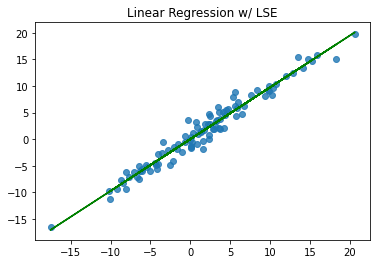

In [5]:
# Run the method to get the optimal weights ------------------------------------
wk, k = grad_des_LSE(x=X[:,[0]], y=Y[:,[0]])

plt.figure()
plt.scatter(X[:,[0]], Y[:,[0]], alpha=0.8)
plt.plot(X[:,[0]], wk[0,-1]*X[:,[0]]+wk[1,-1], c='g')
plt.title("Linear Regression w/ LSE")

## Introduction - part 2

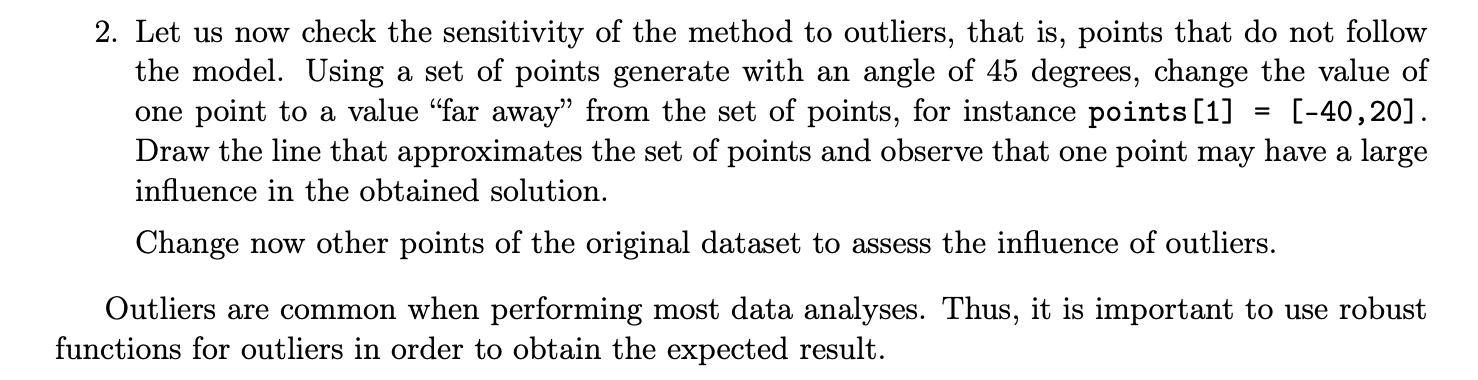

Text(0.5, 1.0, 'Dataset with 1 outlier')

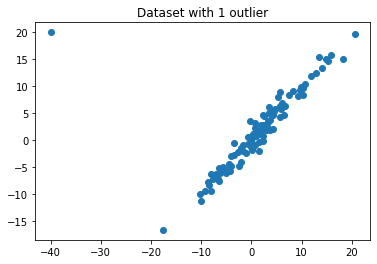

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X[:,[1]], Y[:,[1]])
plt.title("Dataset with 1 outlier")

Text(0.5, 1.0, 'Linear regression on the dataset with 1 outlier')

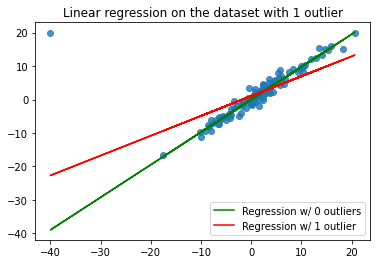

In [7]:
wk_old = np.copy(wk)               # Store the weights obtained with no outliers

# Run the method to get the optimal weights ------------------------------------
wk, k = grad_des_LSE(x=X[:,[1]], y=Y[:,[1]])

# Plot the result of the regression --------------------------------------------
plt.figure()
plt.scatter(X[:,[1]], Y[:,[1]], alpha=0.8)
plt.plot(X[:,[1]], wk_old[0,-1]*X[:,[1]]+wk_old[1,-1], c='g', label="Regression w/ 0 outliers")
plt.plot(X[:,[1]], wk[0,-1]*X[:,[1]]+wk[1,-1], c='r', label="Regression w/ 1 outlier")
plt.legend()
plt.title("Linear regression on the dataset with 1 outlier")

OBSERVATION: The green line is the linear regression obtained in absence of any outlier. The red one is the linear regression obtained with only one outlier (out of 100 samples). The result in the presence of only one outlier is clearly not a good approximation of the distribution, and it is far from the previous approximation

Let's now see what happens with more outliers present in the sample

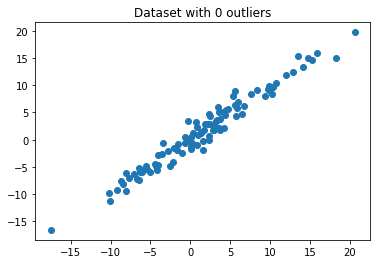

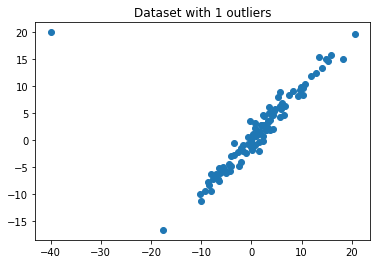

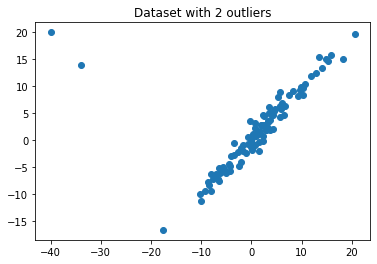

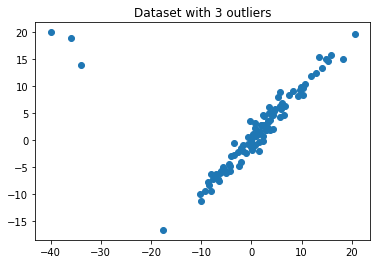

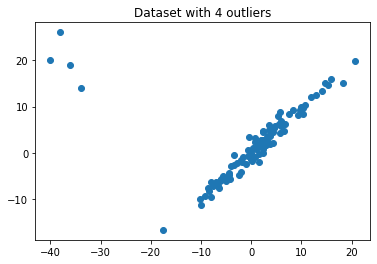

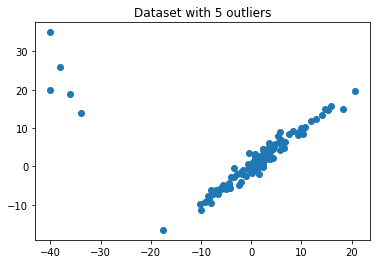

In [8]:
# Visualize the datasets with more outliers ------------------------------------
for j in range(0, X.shape[1]):
  plt.figure()
  plt.scatter(X[:,[j]], Y[:,[j]])
  plt.title("Dataset with " + str(j) + " outliers")

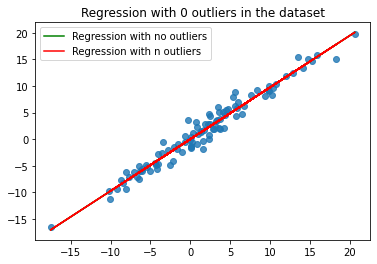

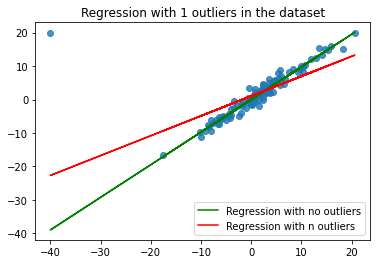

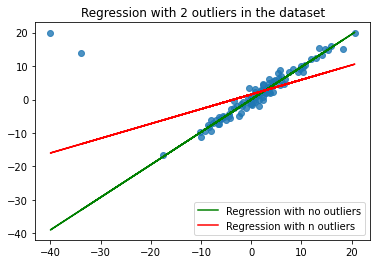

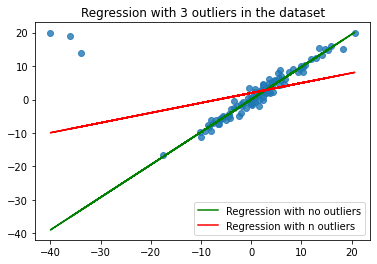

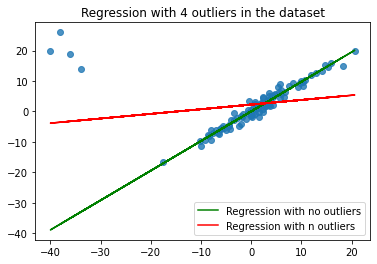

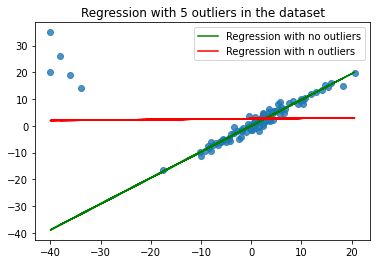

In [9]:
for j in range(0, X.shape[1]):
  # Run the method to get the optimal weights ----------------------------------
  wk, k = grad_des_LSE(x=X[:,[j]], y=Y[:,[j]])

  # Plot the result of the regression ------------------------------------------
  plt.figure()
  plt.scatter(X[:,[j]], Y[:,[j]], alpha=0.8)
  plt.plot(X[:,[j]], wk_old[0,-1]*X[:,[j]]+wk_old[1,-1], c='g', label="Regression with no outliers")
  plt.plot(X[:,[j]], wk[0,-1]*X[:,[j]]+wk[1,-1], c='r', label="Regression with n outliers")
  plt.title("Regression with " + str(j) + " outliers in the dataset")
  plt.legend()

OBSERVATION: The red line is the linear regression with n outliers. The higher the number of outliers the worse the result, meaning the larger the number of outliers in the dataset the further away the regression is from approximating the generated distribution

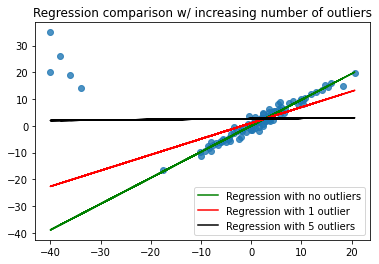

In [10]:
# Run the method to get the optimal weights ------------------------------------
wk_no, k_no = grad_des_LSE(x=X[:,[0]], y=Y[:,[0]])
wk_one, k_one = grad_des_LSE(x=X[:,[1]], y=Y[:,[1]])

# Plot the result of the regression --------------------------------------------
plt.figure()
plt.scatter(X[:,[-1]], Y[:,[-1]], alpha=0.8)
plt.plot(X[:,[-1]], wk_no[0,-1]*X[:,[-1]]+wk_no[1,-1], c='g', label="Regression with no outliers")
plt.plot(X[:,[-1]], wk_one[0,-1]*X[:,[-1]]+wk_one[1,-1], c='r', label="Regression with 1 outlier")
plt.plot(X[:,[-1]], wk[0,-1]*X[:,[-1]]+wk[1,-1], c='k', label="Regression with 5 outliers")
plt.title("Regression comparison w/ increasing number of outliers")
plt.legend()

OBSERVATION: Lastly, we visualize the result comparing the regression with one outlier and the one with 5 outliers with the regression with no outliers. Here it can be observed how much worse the approximation becomes with only 5 outliers present.

# **Ex.2 - Robust functions**

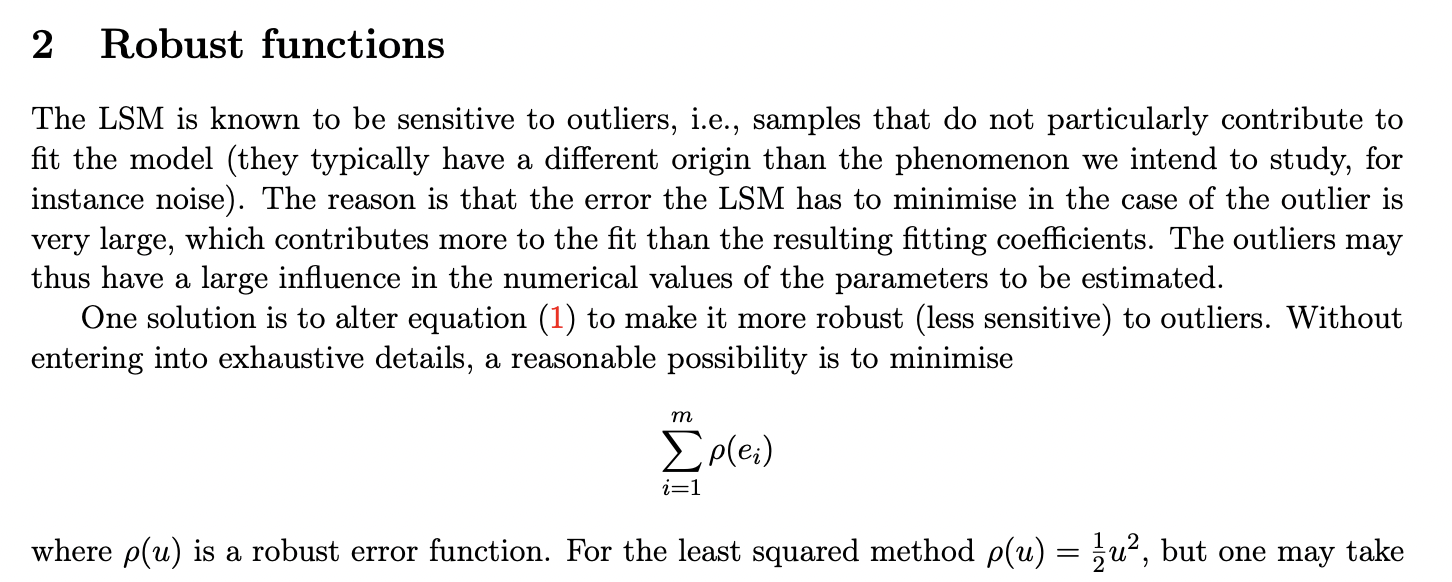

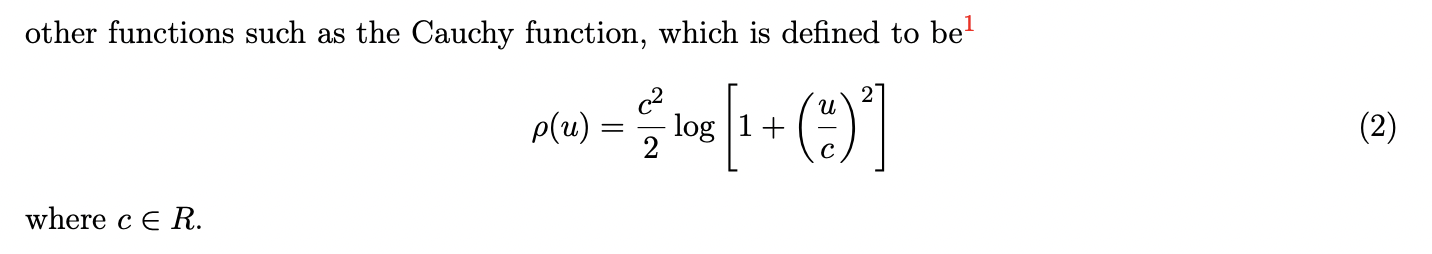

## Robust functions - part 1

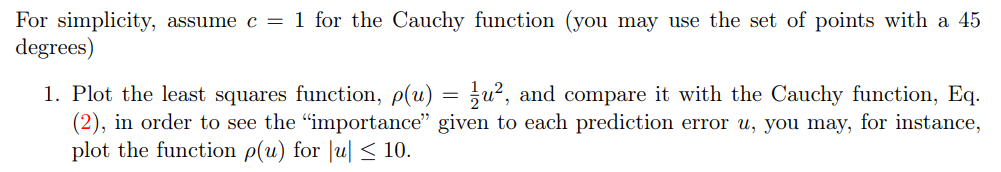

In [131]:
import numpy as np

# Defining functions -----------------------------------------------------------
def LSE_aux(u): 
  return 1/2*(u**2)

def Cauchy_aux(u, c=1):
  return (c**2)/2*np.log(1 + (u/c)**2)

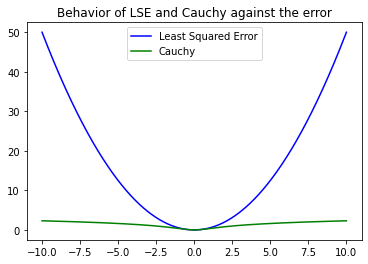

In [132]:
import matplotlib.pyplot as plt

# Generate points to plot the functions ----------------------------------------
ulim = 10
u = np.linspace(-ulim, ulim, 1000)

# Plot the functions -----------------------------------------------------------
plt.figure()
plt.plot(u, LSE_aux(u), c='b')
plt.plot(u, Cauchy_aux(u, 1), c='g')
plt.title("Behavior of LSE and Cauchy against the error")
plt.legend(['Least Squared Error', 'Cauchy'])

OBSERVATION: as we can observe from the plot, the Cauchy function gives smaller outputs for larger input values, compared to the Least Squared Error function. This will allow us to reduce the weight of the outliers on the loss function.

## Robust functions - part 2

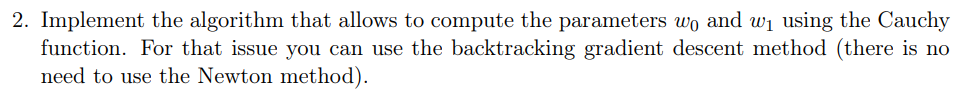

Text(0.5, 1.0, 'Dataset: linearly generated point cloud w/ noise')

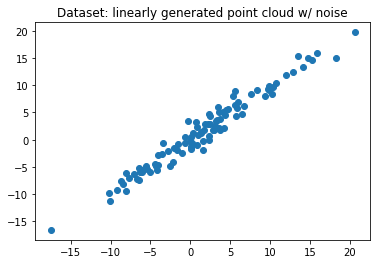

In [133]:
import numpy as np
import matplotlib.pyplot as plt

m = [0.,0.]
angle = 45*np.pi/180
rot = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle),
np.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
np.random.seed(536)    # Added for reproducibility
points = np.random.multivariate_normal(m,s,100)

xo = np.zeros(points.shape[0])
yo = np.zeros(points.shape[0])
for i in range(0, len(points)):
  xo[i] = points[i][0]
  yo[i] = points[i][1]

xo = xo.reshape([100,1])      # Make sure they are column vectors 
yo = yo.reshape([100,1])

plt.scatter(xo, yo)
plt.title("Dataset: linearly generated point cloud w/ noise")

In the following section we generate different dataset with different number of outliers. This is done now for uniformity of notation in the notebook

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


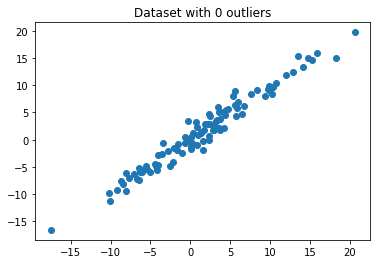

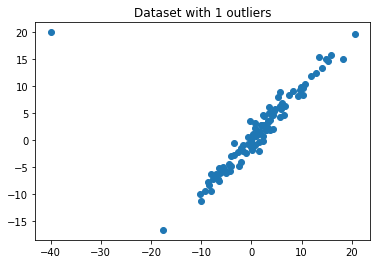

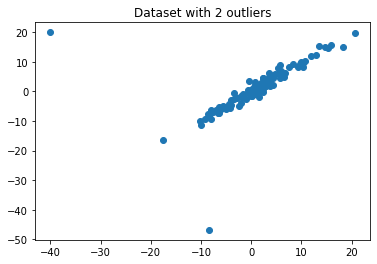

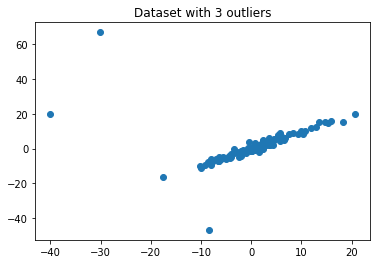

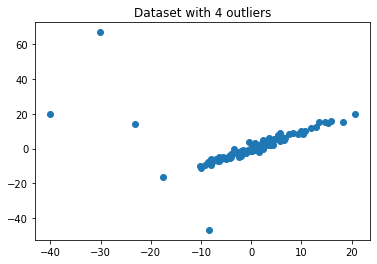

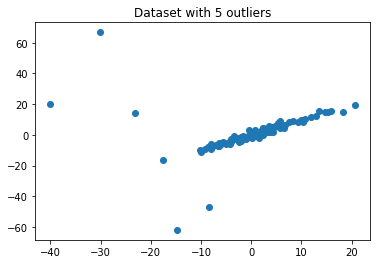

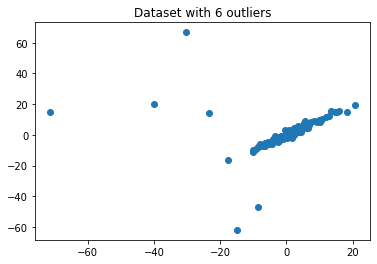

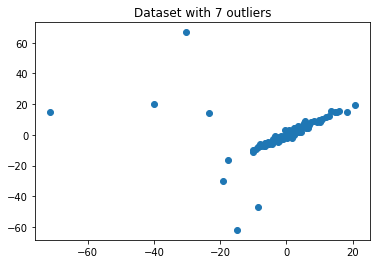

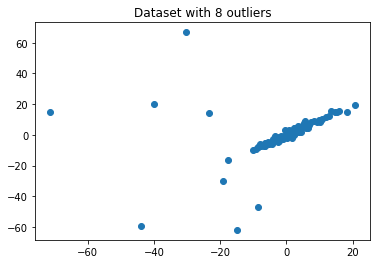

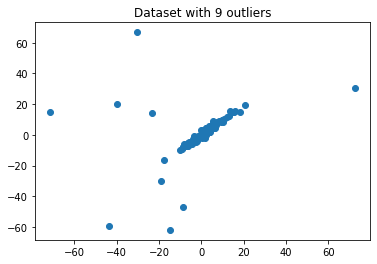

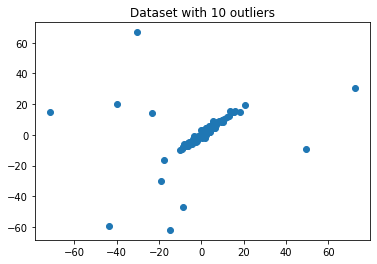

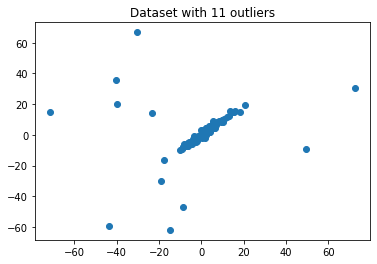

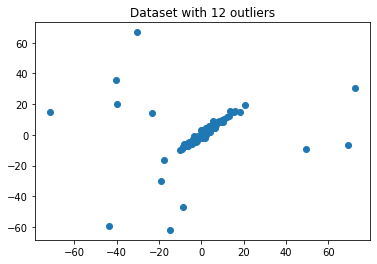

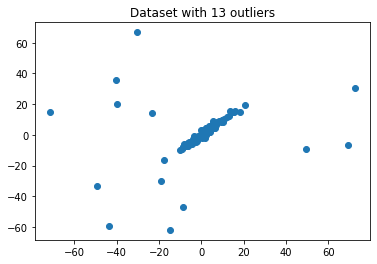

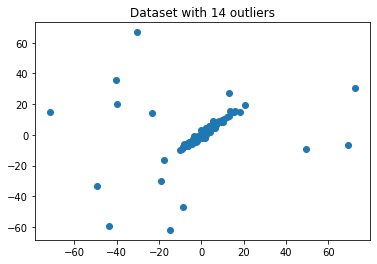

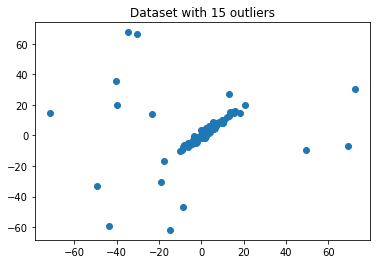

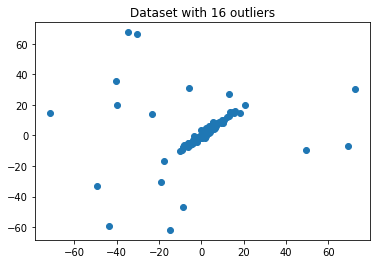

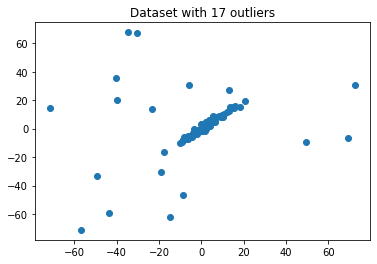

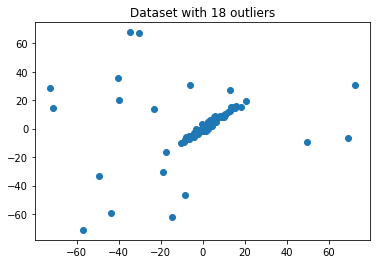

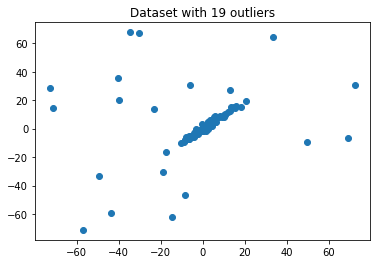

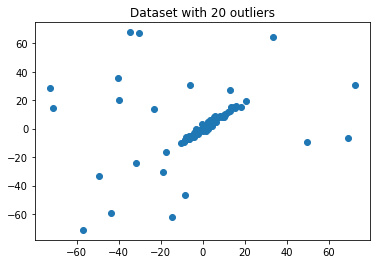

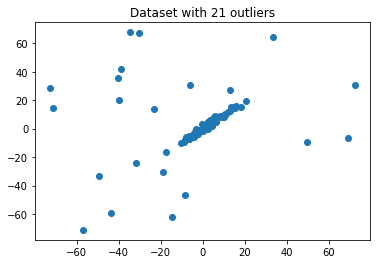

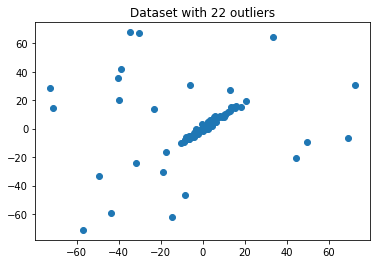

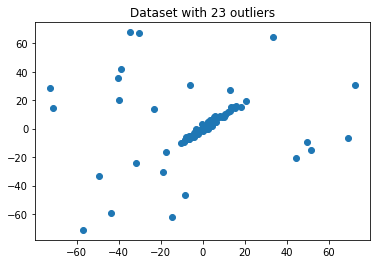

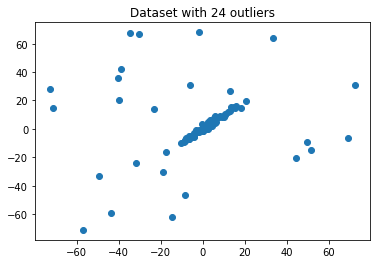

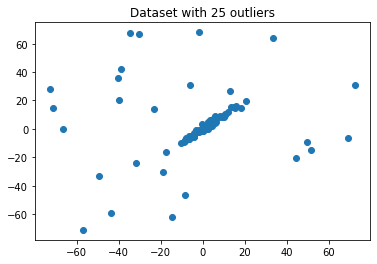

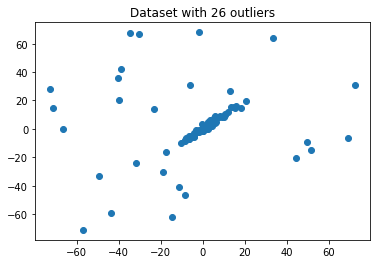

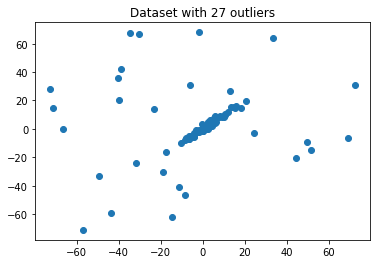

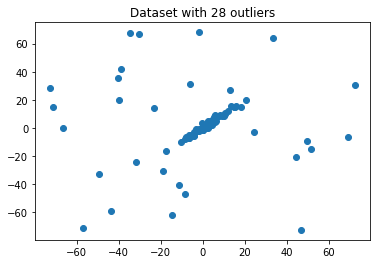

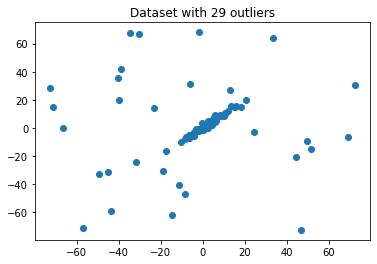

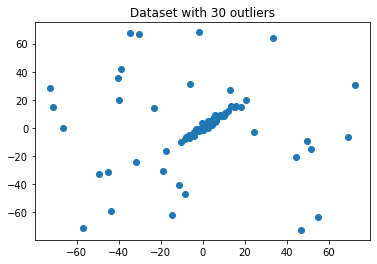

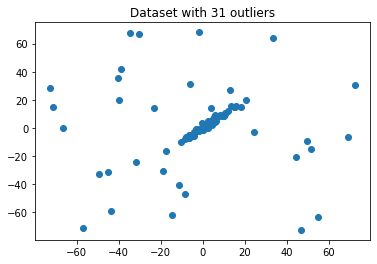

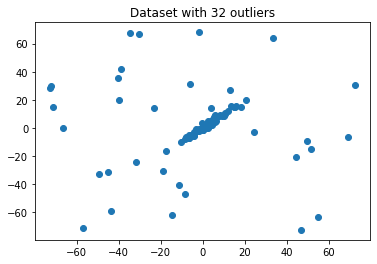

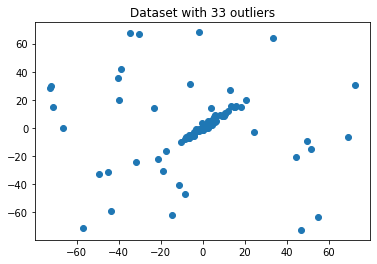

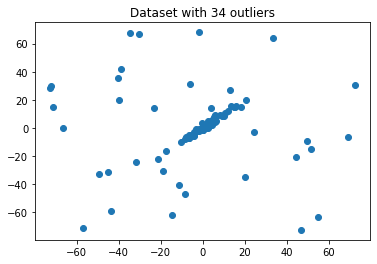

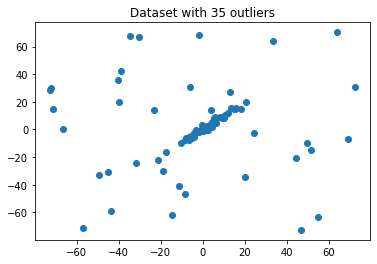

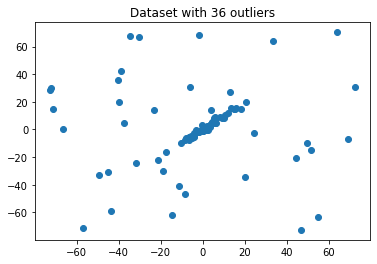

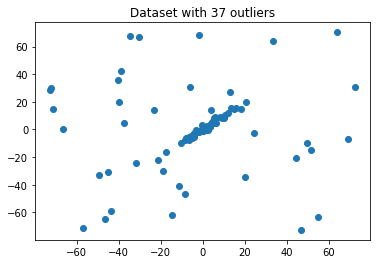

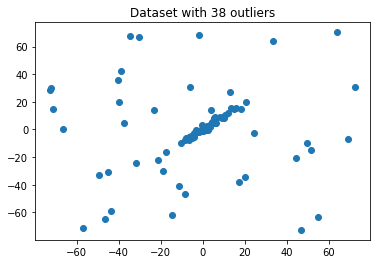

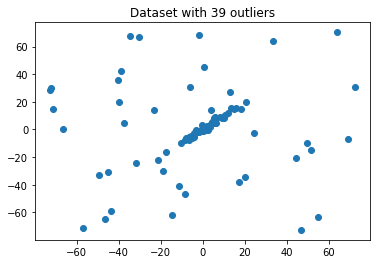

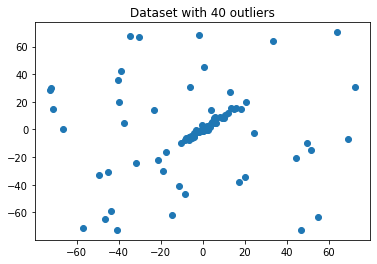

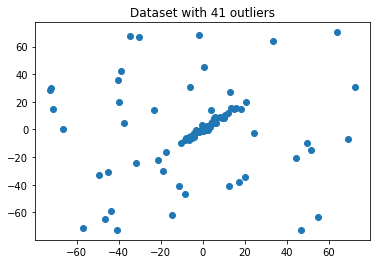

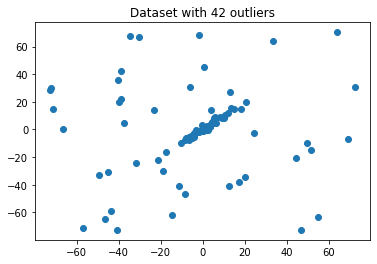

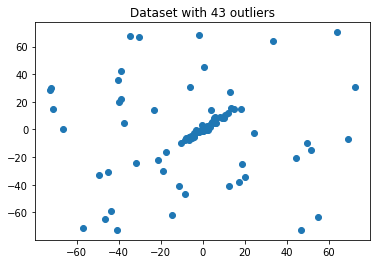

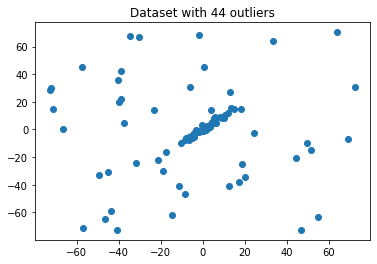

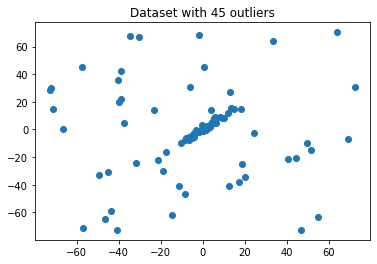

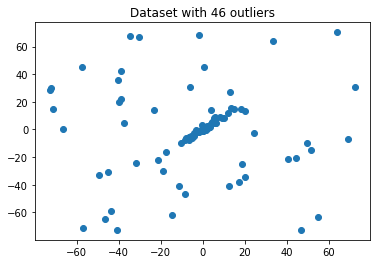

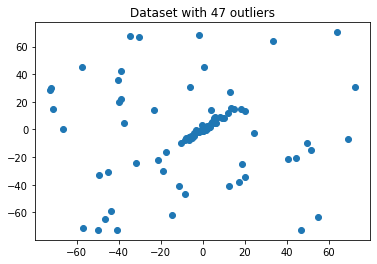

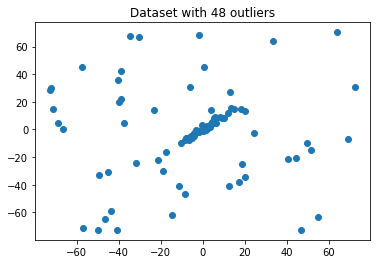

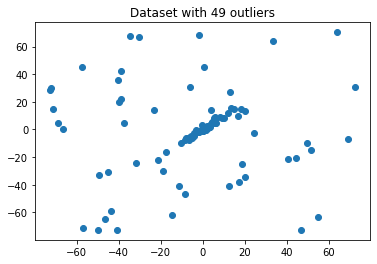

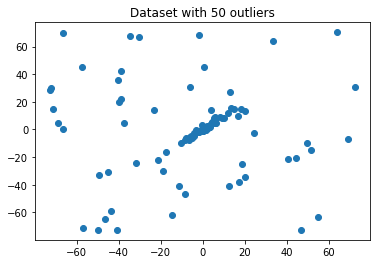

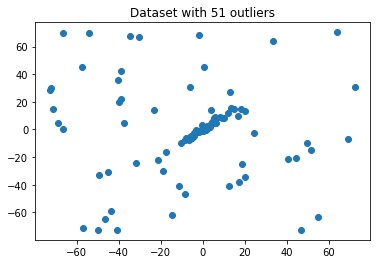

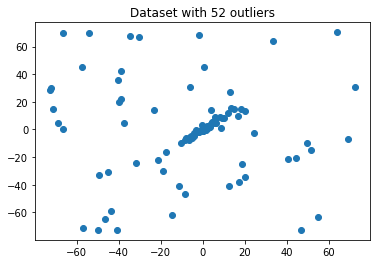

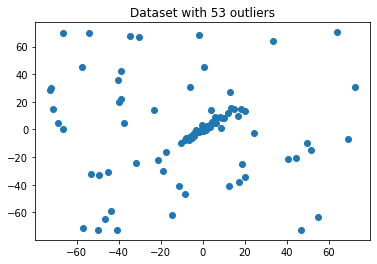

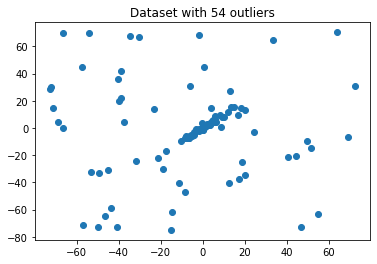

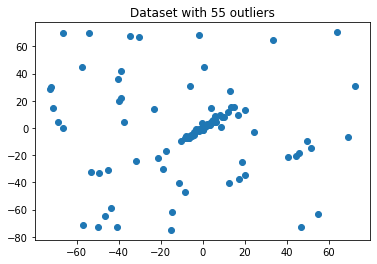

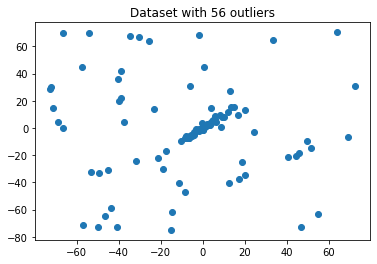

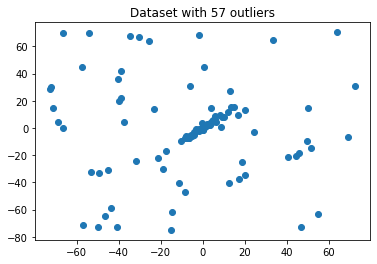

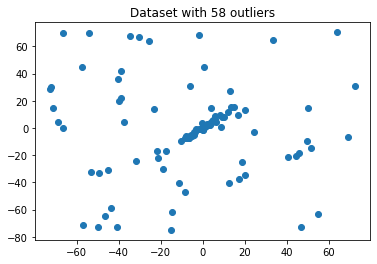

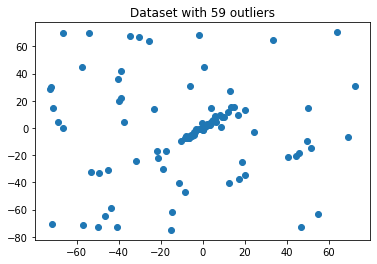

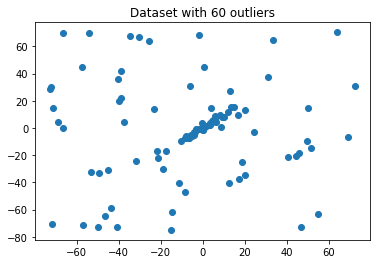

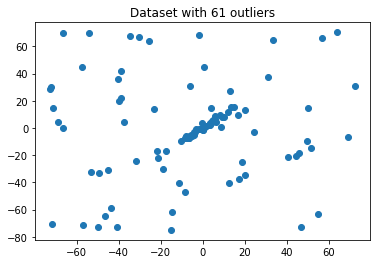

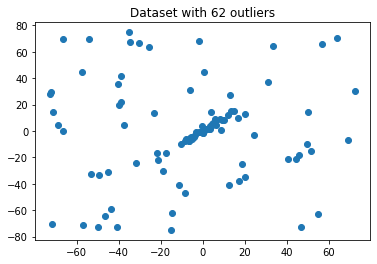

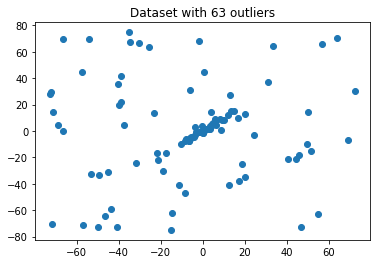

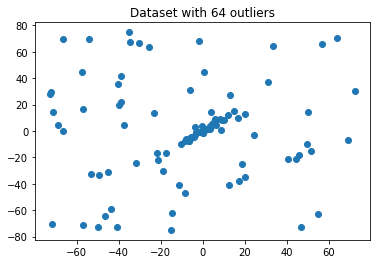

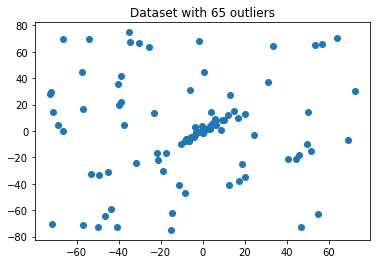

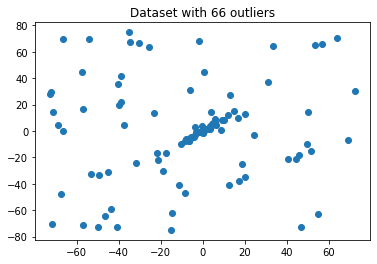

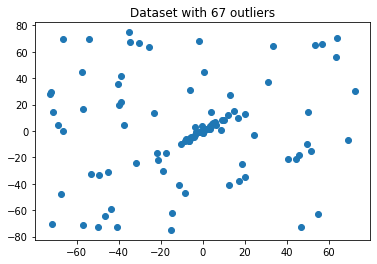

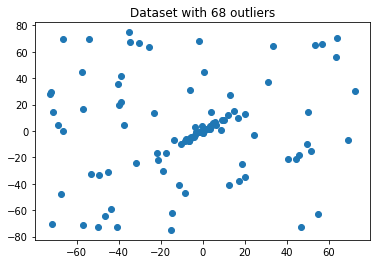

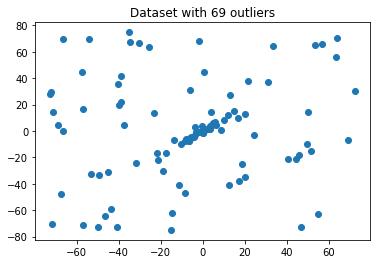

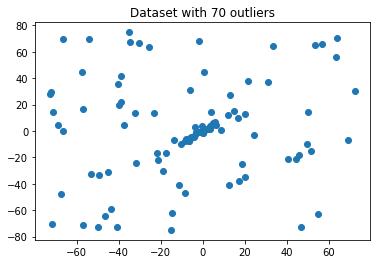

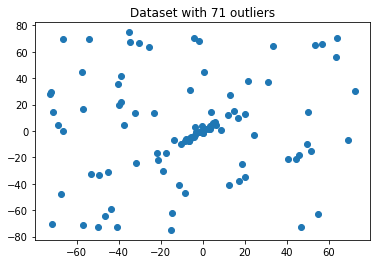

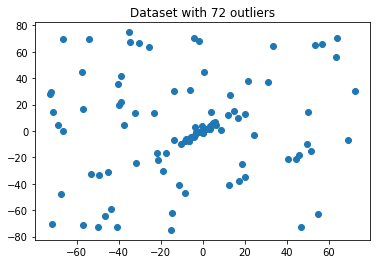

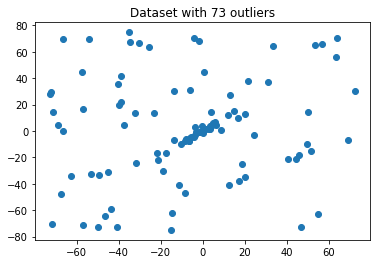

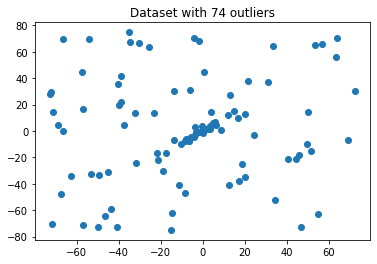

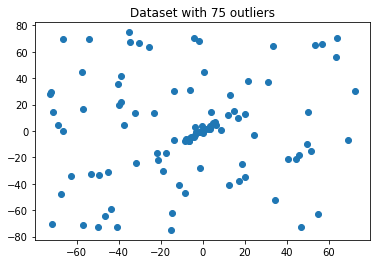

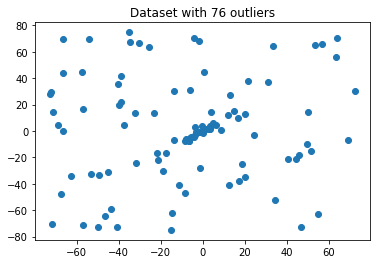

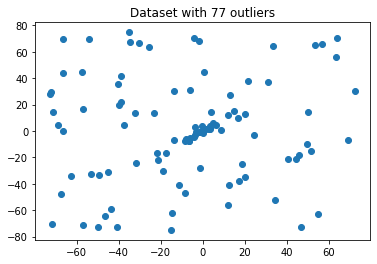

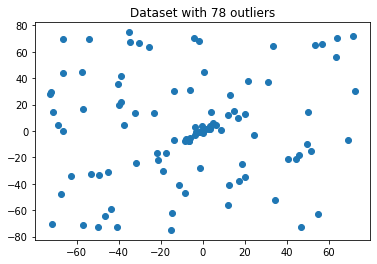

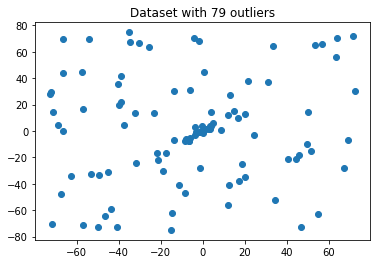

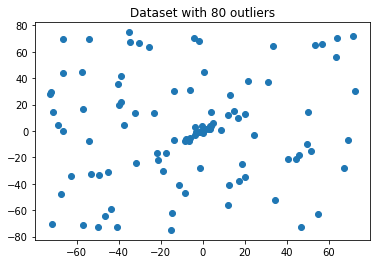

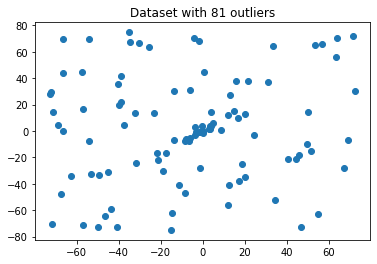

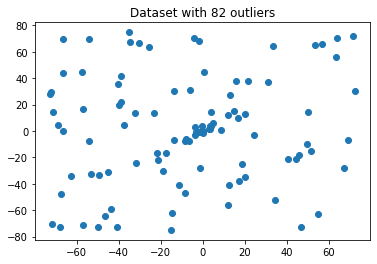

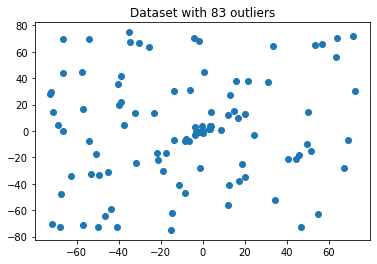

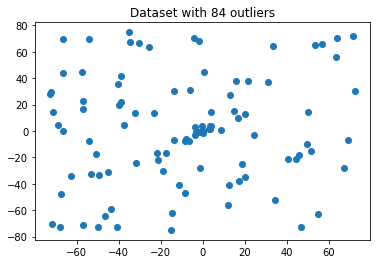

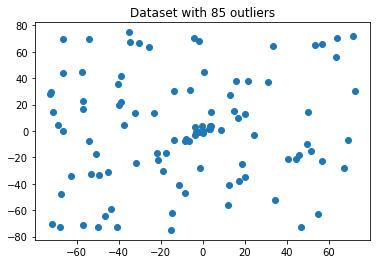

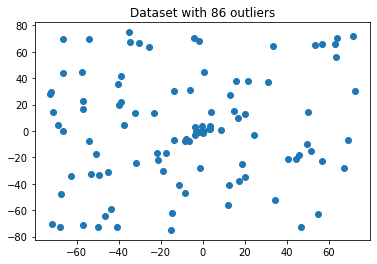

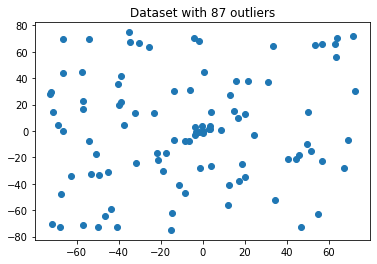

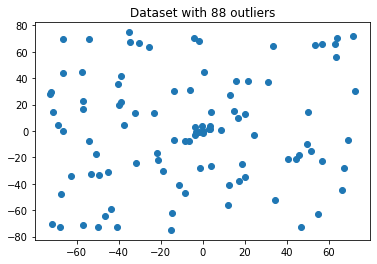

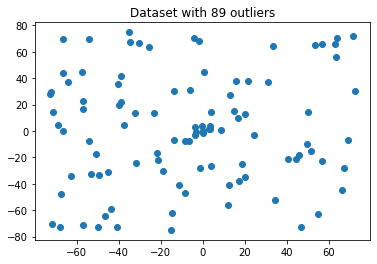

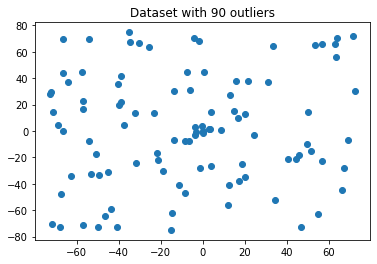

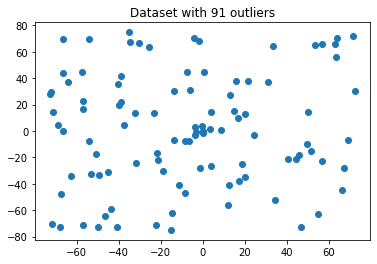

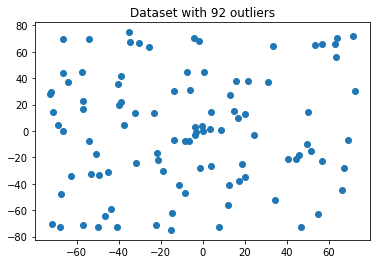

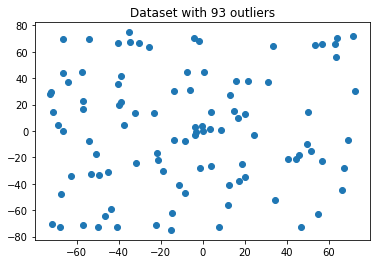

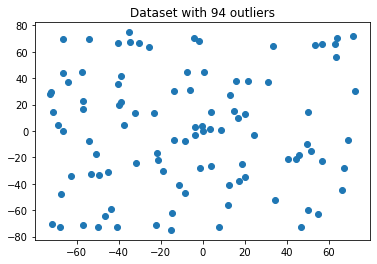

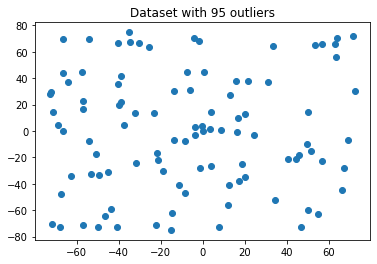

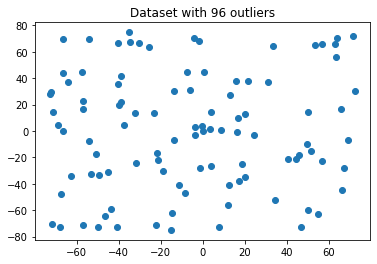

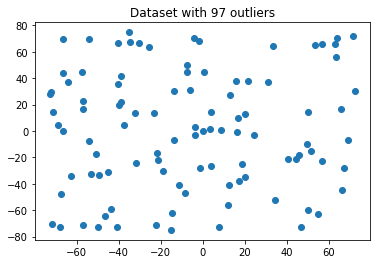

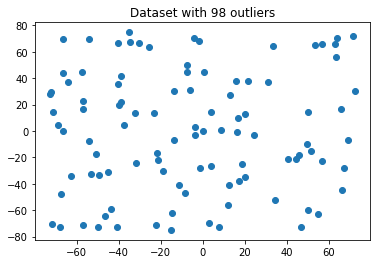

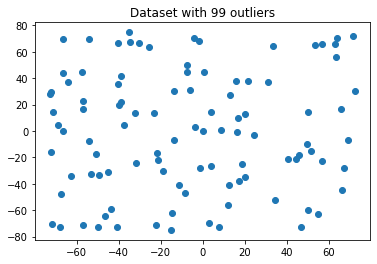

In [134]:
# Generate more outliers in the dataset ----------------------------------------
N = 99                         # Number of points changed to outliers 
n = int(len(xo)/(N+1))             

X = np.zeros([len(xo),N+1])      # Initiate matrices to store the values of the dataset for different numbers of outliers
Y = np.zeros([len(yo),N+1])      # The j-th column will correspond to the coordinates of the dateset with i outliers

for j in range(0, N+1):
  X[:,[j]] = xo            # The current dataset 
  Y[:,[j]] = yo

X[1,1] = -40         # The dataset with one outlier
Y[1,1] = 20

for j in range(2, N+1):       # The other datasets that will be used, with up to N outliers
  X[:,[j]] = X[:,[j-1]]       # Copy of the dataset with j-1 outliers
  Y[:,[j]] = Y[:,[j-1]]
  X[j*n,[j]] = (np.random.rand(1)-0.5) * 150      # Add one outlier
  Y[j*n,[j]] = (np.random.rand(1)-0.5) * 150 

for j in range(0, N+1):
  plt.figure()
  plt.scatter(X[:,[j]], Y[:,[j]])
  plt.title("Dataset with " + str(j) + " outliers")

In [135]:
def Cauchy(w, x, y, c=1):
  return np.sum(c**2 / 2 * np.log(1 + ((w[0] * x + w[1]- y) / c)**2))

# Cauchy Method gradient
def gradient_C(w, x, y, c=1):
  err = w[0] * x + w[1] - y
  return np.array([np.sum((x * err) / (1 + (err / c)**2)), np.sum(err / (1 + (err / c)**2))]).reshape([2,1])

# Defining the loss function, in this case mean squared errors -----------------
def Q(w, x, y):
  return 1/2*(np.sum((w[0]*x + w[1]*np.ones([len(x),1]) - y)**2))

# Defining the gradient of the function to minimize (loss function) ------------
def gradient_Q(w, x, y):
  res = np.zeros([2,1])
  res[0] = np.dot(x.T, w[0]*x + w[1]*np.ones([len(x),1]) - y)
  res[1] = np.sum(w[0]*x + w[1]*np.ones([len(x),1]) - y)
  return res 

# Define the gradient descent method with Cauchy -------------------------------
def grad_des_Cauchy(x, y, w0=None, tol=1e-5, c=1):     # Defining a gradient descent method with a non-constant step size
  """ Gradient descent method
  Direction of descent: steepest, alpha: adjusted
  Returns xk (2xk+1), k (number of iterations)
  """
  import numpy as np

  if w0 == None:        # Initialize the weigths as random ones if not given
    np.random.seed(536)
    w0 = np.random.randn(2).reshape([2,1])

  wk = np.zeros([2,1])
  wk[:,[0]] = w0
  k = 0

  grad = gradient_C(wk[:,[k]], x, y, c)     # First iteration of the method (used in order not to have issues with entering the while loop on the first iteration)
  alpha = 1                       # Initial value of alpha
  wk = np.append(wk, wk[:,[k]] - alpha*grad, axis=1)
  while Cauchy(wk[:,[k+1]], x, y, c) > Cauchy(wk[:,[k]], x, y, c):        # Backtracking
    alpha = alpha/2           # Update alpha
    wk[:,[k+1]] = wk[:,[k]] - alpha*grad       # Compute wk+1 once again and check if the value of the function has decreased
    if alpha<tol*1e-20:       # This condition is added in order to stop the function if the improvement is really small
      break
  k = k+1
  grad = gradient_C(wk[:,[k]], x, y, c)     # Update the gradient


  while np.linalg.norm(grad)>tol and np.abs(Cauchy(wk[:,[k]], x, y, c)-Cauchy(wk[:,[k-1]], x, y, c))>tol*1e-20:
    grad = gradient_C(wk[:,[k]], x, y, c)
    alpha = 1                       # Initial value of alpha
    wk = np.append(wk, wk[:,[k]] - alpha*grad, axis=1)
    while Cauchy(wk[:,[k+1]], x, y, c) > Cauchy(wk[:,[k]], x, y, c):        # Backtracking
      alpha = alpha/2           # Update alpha
      wk[:,[k+1]] = wk[:,[k]] - alpha*grad       # Compute wk+1 once again and check if the value of the function has decreased
      if alpha<tol*1e-20:       # This condition is added in order to stop the function if the improvement is really small
        return wk, k

    k = k+1
    
  return wk, k

# Define the gradient descent method -------------------------------------------
def grad_des_LSE(x, y, w0=None, tol=1e-5):     # Defining a gradient descent method with a non-constant step size
  """ Gradient descent method
  Direction of descent: steepest, alpha: adjusted
  Returns xk (2xk+1), k (number of iterations)
  """
  import numpy as np

  if w0 == None:        # Initialize the weigths as random ones if not given
    np.random.seed(536)
    w0 = np.random.randn(2).reshape([2,1])

  wk = np.zeros([2,1])
  wk[:,[0]] = w0        
  k = 0

  grad = gradient_Q(wk[:,[k]], x, y)    # First iteration of the method (used in order not to have issues with entering the while loop on the first iteration)
  alpha = 1                       # Initial value of alpha
  wk = np.append(wk, wk[:,[k]] - alpha*grad, axis=1)
  while Q(wk[:,[k+1]], x, y) > Q(wk[:,[k]], x, y):        # Backtracking
    alpha = alpha/2           # Update alpha
    wk[:,[k+1]] = wk[:,[k]] - alpha*grad       # Compute wk+1 once again and check if the value of the function has decreased
  k = k+1
  grad = gradient_Q(wk[:,[k]], x, y)    # Update the gradient

  while np.linalg.norm(grad)>tol and np.abs(Q(wk[:,[k]], x, y)-Q(wk[:,[k-1]], x, y))>tol:     # Iterations of the method till stop criteria are satisfied
    grad = gradient_Q(wk[:,[k]], x, y)
    alpha = 1                       # Initial value of alpha
    wk = np.append(wk, wk[:,[k]] - alpha*grad, axis=1)
    while Q(wk[:,[k+1]], x, y) > Q(wk[:,[k]], x, y):        # Backtracking
      alpha = alpha/2           # Update alpha
      wk[:,[k+1]] = wk[:,[k]] - alpha*grad       # Compute wk+1 once again and check if the value of the function has decreased
    k = k+1

  return wk, k

## Robust functions - part 3

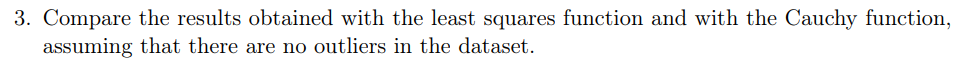

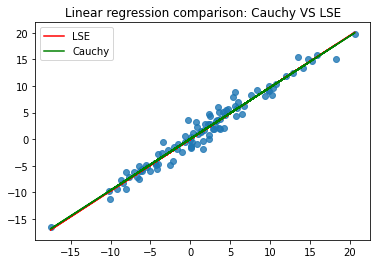

In [136]:
# Run the method to get the optimal weights ------------------------------------
wk1, k1 = grad_des_LSE(X[:,[0]], Y[:,[0]])
wk2, k2 = grad_des_Cauchy(X[:,[0]], Y[:,[0]])

plt.figure()
plt.scatter(X[:,[0]], Y[:,[0]], alpha=0.8)
plt.plot(X[:,[0]], wk1[0,-1]*X[:,[0]]+wk1[1,-1], c='r', label='LSE')
plt.plot(X[:,[0]], wk2[0,-1]*X[:,[0]]+wk2[1,-1], c='g', label='Cauchy')
plt.title("Linear regression comparison: Cauchy VS LSE")
plt.legend()

In [137]:
print("The following are the weights obtained using LSE: " + str(wk1[0,-1]) + ", " + str(wk1[1,-1]))
print("The following are the weights obtained using Cauchy: " + str(wk2[0,-1]) + ", " + str(wk2[1,-1]))

The following are the weights obtained using LSE: 0.9738141734955793, 0.0001260293225103259
The following are the weights obtained using Cauchy: 0.9662173052932739, 0.06361248053228953


OBSERVATION: if no outliers are present in the dataset, the obtained results are almost the same. Both loss functions give us a goog approximation of the distribution

Let's now, for better understanding, see how different values of c in the Cauchy function give different regression results

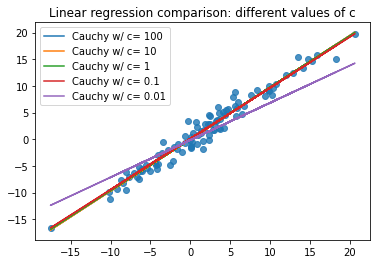

In [138]:
# Visualize how the regressions change with different values of c --------------
c = [100,10,1,1/10,1/100]

plt.figure()
plt.scatter(X[:,[0]], Y[:,[0]], alpha=0.8)


for i in range(0, len(c)):
  wk, k = grad_des_Cauchy(X[:,[0]], Y[:,[0]], c=c[i])
  labeli = "Cauchy w/ c= " + str(c[i])
  plt.plot(X[:,[0]], wk[0,-1]*X[:,[0]]+wk[1,-1], label=labeli)

plt.title("Linear regression comparison: different values of c")
plt.legend()

In this case, with no outliers, the result is the same for most of the values of c. However we can see that for c=1/100 the function already does not give a good regression. This already suggests the importance of choosing an appropriate value for the parameter c based on the dataset it is being used for

## Robust functions - part 4

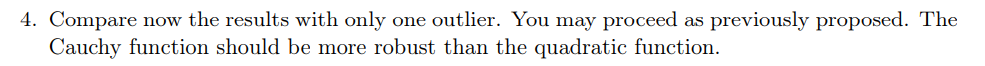

Text(0.5, 1.0, 'Dataset with 1 outlier')

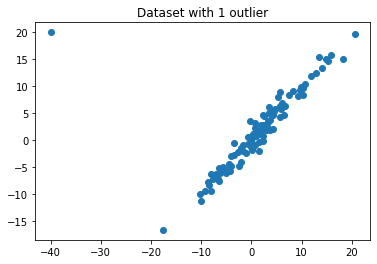

In [139]:
# Visualize the dataset with one outlier ---------------------------------------
plt.scatter(X[:,[1]], Y[:,[1]])
plt.title("Dataset with 1 outlier")

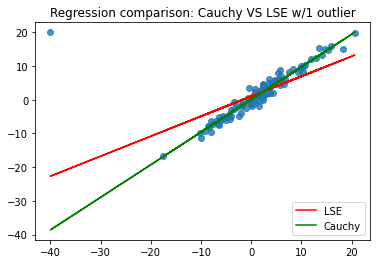

In [140]:
# Run the method to get the optimal weights with one outlier -------------------
wk1, k1 = grad_des_LSE(X[:,[1]], Y[:,[1]])
wk2, k2 = grad_des_Cauchy(X[:,[1]], Y[:,[1]])

plt.figure()
plt.scatter(X[:,[1]], Y[:,[1]], alpha=0.8)
plt.plot(X[:,[1]], wk1[0,-1]*X[:,[1]]+wk1[1,-1], c='r', label='LSE')
plt.plot(X[:,[1]], wk2[0,-1]*X[:,[1]]+wk2[1,-1], c='g', label='Cauchy')
plt.title("Regression comparison: Cauchy VS LSE w/1 outlier")
plt.legend()

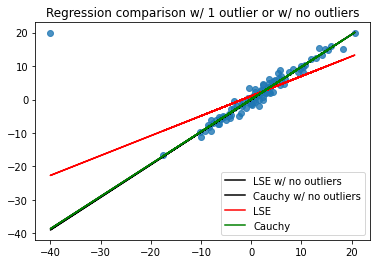

In [141]:
# Run the method on the dataset w/ no outlier ----------------------------------
wk1_no, k1_no = grad_des_LSE(X[:,[0]], Y[:,[0]])
wk2_no, k2_no = grad_des_Cauchy(X[:,[0]], Y[:,[0]])

# Compare the results of the previous regression w/ the one w/ no outliers -----
plt.figure()
plt.scatter(X[:,[1]], Y[:,[1]], alpha=0.8)
plt.plot(X[:,[1]], wk1_no[0,-1]*X[:,[1]]+wk1_no[1,-1], c='k', label='LSE w/ no outliers')
plt.plot(X[:,[1]], wk2_no[0,-1]*X[:,[1]]+wk2_no[1,-1], c='k', label='Cauchy w/ no outliers')
plt.plot(X[:,[1]], wk1[0,-1]*X[:,[1]]+wk1[1,-1], c='r', label='LSE')
plt.plot(X[:,[1]], wk2[0,-1]*X[:,[1]]+wk2[1,-1], c='g', label='Cauchy')
plt.title("Regression comparison w/ 1 outlier or w/ no outliers")
plt.legend()

OBSERVATIONS: </br>
*   The regression obtained using LSE with only one outlier present in the dataset does not approximate the distribution well. On the other hand, the regression obtained with Cauchy is closer to the one obtained with no outliers, thus it still approximates well the distribution. 
*   The linear regression with Cauchy's function is clearly more robust and less sensible to the presence of outliers, at least when only one outlier is present

Let's now, for better understanding, see how different values of c in the Cauchy function give different regression results

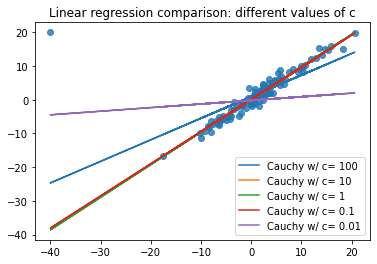

In [142]:
# Visualize how the regressions change with different values of c --------------
c = [100,10,1,1/10,1/100]

plt.figure()
plt.scatter(X[:,[1]], Y[:,[1]], alpha=0.8)


for i in range(0, len(c)):
  wk, k = grad_des_Cauchy(X[:,[1]], Y[:,[1]], c=c[i])
  labeli = "Cauchy w/ c= " + str(c[i])
  plt.plot(X[:,[1]], wk[0,-1]*X[:,[1]]+wk[1,-1], label=labeli)

plt.title("Linear regression comparison: different values of c")
plt.legend()

With only one outlier in the dataset the obtained regressions already differ considerably. This suggests the importance of choosing the most suitable value for the parameter c depending on the dataset considered

## Robust functions - part 5

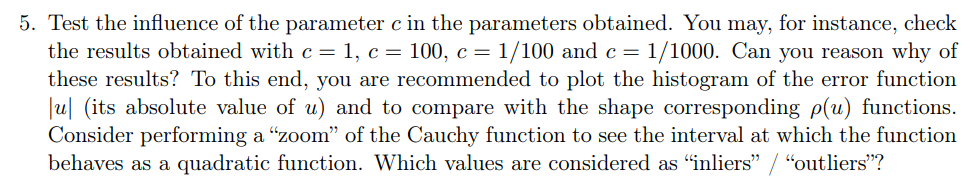

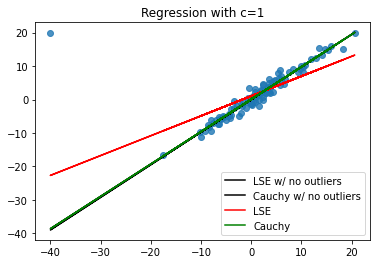

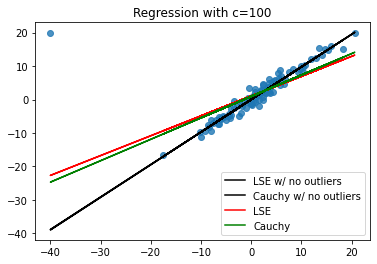

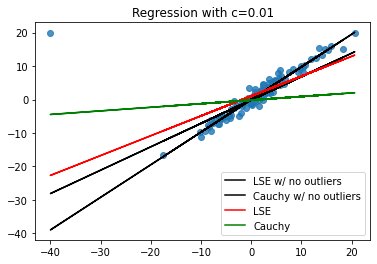

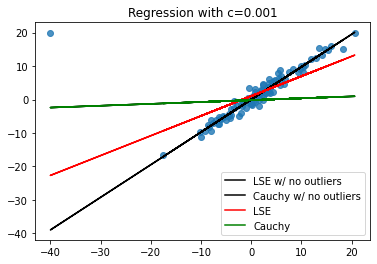

In [143]:
# Plot the obtained regression with different values of c and with one outlier -
c = [1, 100, 1/100, 1/1000]         

for i in range(0, len(c)):
  # Run the method on the dataset with no outliers -----------------------------
  wk1_no, k1_no = grad_des_LSE(X[:,[0]], Y[:,[0]])
  wk2_no, k2_no = grad_des_Cauchy(X[:,[0]], Y[:,[0]], c=c[i])

  # Run the method on  the dataset with one outlier ----------------------------
  wk1, k1 = grad_des_LSE(X[:,[1]], Y[:,[1]])
  wk2, k2 = grad_des_Cauchy(X[:,[1]], Y[:,[1]], c=c[i])

  # Plot the obtained regression -----------------------------------------------
  plt.figure()
  plt.scatter(X[:,[1]], Y[:,[1]], alpha=0.8)
  plt.plot(X[:,[1]], wk1_no[0,-1]*X[:,[1]]+wk1_no[1,-1], c='k', label='LSE w/ no outliers')
  plt.plot(X[:,[1]], wk2_no[0,-1]*X[:,[1]]+wk2_no[1,-1], c='k', label='Cauchy w/ no outliers')
  plt.plot(X[:,[1]], wk1[0,-1]*X[:,[1]]+wk1[1,-1], c='r', label='LSE')
  plt.plot(X[:,[1]], wk2[0,-1]*X[:,[1]]+wk2[1,-1], c='g', label='Cauchy')
  plt.title("Regression with c=" + str(c[i]))
  plt.legend()

OBSERVATIONS: </br>
*   From the previous plots of the obtained linear regressions it's clear the parameter c of the Cauchy function has an important influence on its robustness in the presence of one outlier. 
*   In order to understand better the effect of different values of the parameter c on the method's robustness, we can plot the behaviour of the Cauchy function compared to the least squares method for different values of the error. This will be done in the following section

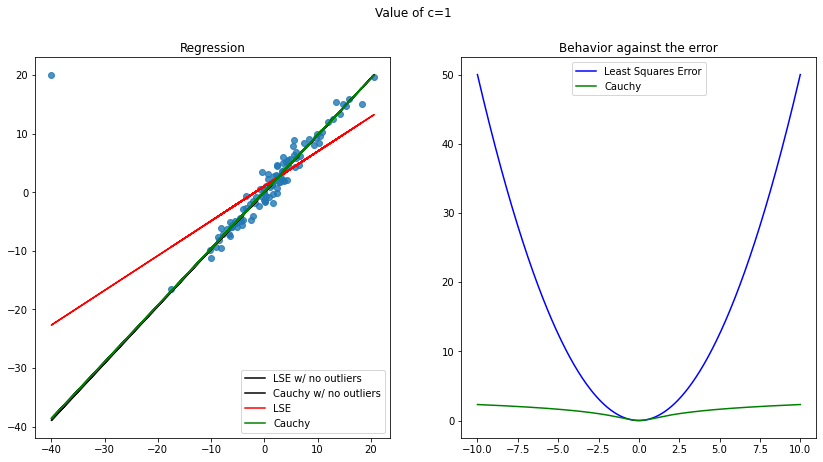

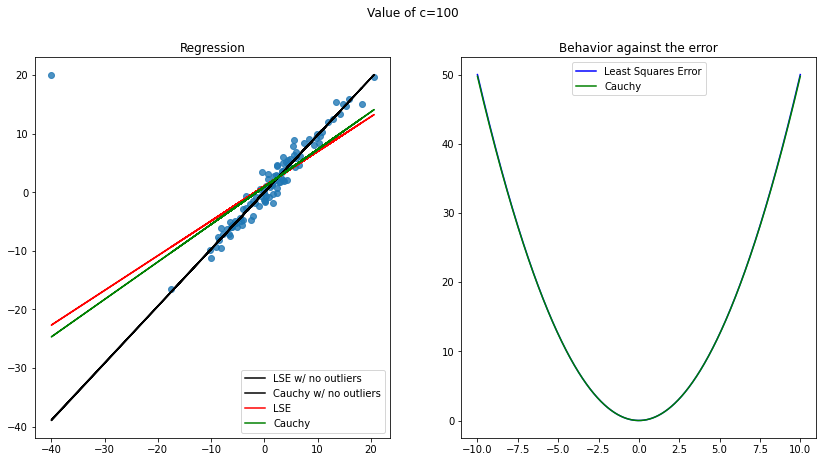

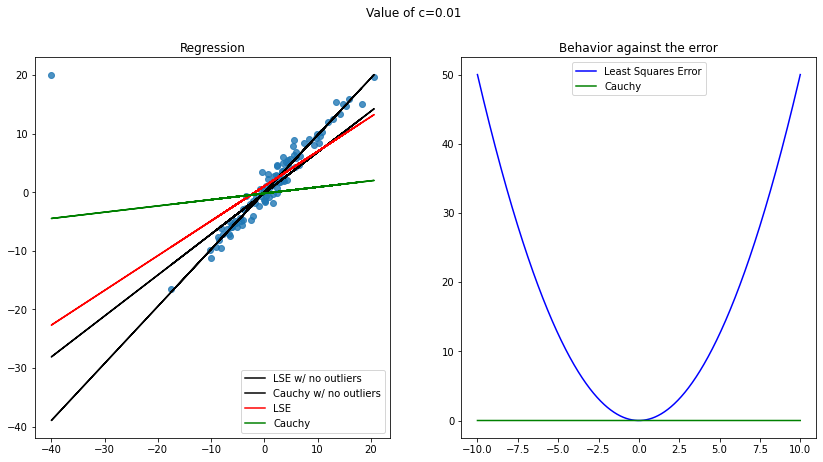

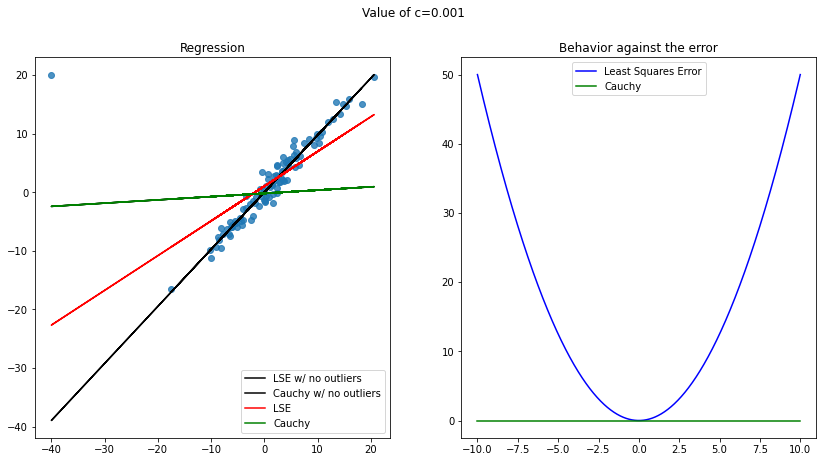

In [144]:
# Plot the obtained regression with different values of c and with one outlier -
c = [1, 100, 1/100, 1/1000]    

for i in range(0, len(c)):
  # Run the method on the dataset with no outliers -----------------------------
  wk1_no, k1_no = grad_des_LSE(X[:,[0]], Y[:,[0]])
  wk2_no, k2_no = grad_des_Cauchy(X[:,[0]], Y[:,[0]], c=c[i])

  # Run the method on  the dataset with one outlier ----------------------------
  wk1, k1 = grad_des_LSE(X[:,[1]], Y[:,[1]])
  wk2, k2 = grad_des_Cauchy(X[:,[1]], Y[:,[1]], c=c[i])

  # Plot the obtained regression -----------------------------------------------
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
  fig.suptitle("Value of c=" + str(c[i]))
  ax1.scatter(X[:,[1]], Y[:,[1]], alpha=0.8)
  ax1.plot(X[:,[1]], wk1_no[0,-1]*X[:,[1]]+wk1_no[1,-1], c='k', label='LSE w/ no outliers')
  ax1.plot(X[:,[1]], wk2_no[0,-1]*X[:,[1]]+wk2_no[1,-1], c='k', label='Cauchy w/ no outliers')
  ax1.plot(X[:,[1]], wk1[0,-1]*X[:,[1]]+wk1[1,-1], c='r', label='LSE')
  ax1.plot(X[:,[1]], wk2[0,-1]*X[:,[1]]+wk2[1,-1], c='g', label='Cauchy')
  ax1.legend()
  ax1.set_title("Regression")

  # Generate points to plot the functions against the error --------------------
  ulim = 10
  u = np.linspace(-ulim, ulim, 1000)

  # Plot the functions ---------------------------------------------------------
  ax2.plot(u, LSE_aux(u), c='b')
  ax2.plot(u, Cauchy_aux(u, c[i]), c='g')
  ax2.legend(['Least Squares Error', 'Cauchy'])
  ax2.set_title("Behavior against the error")

OBSERVATIONS: </br>
*   Comparing the plots we can see that the regression obtained with the Cauchy function is more robust in the presence of one outlier when its behavior is less steep with higher values of the error, meaning these values have a lower weight on the loss function. (As previously noted)
*   In particular, when c=100, the behavior of the Cauchy function is almost the same of the least squares error function. It approximates a quadratic function and, as one should expect, the linear regression with c=100 is not robust and it approximates the distribution almost as badly as the linear regression obtained with the least squares loss function

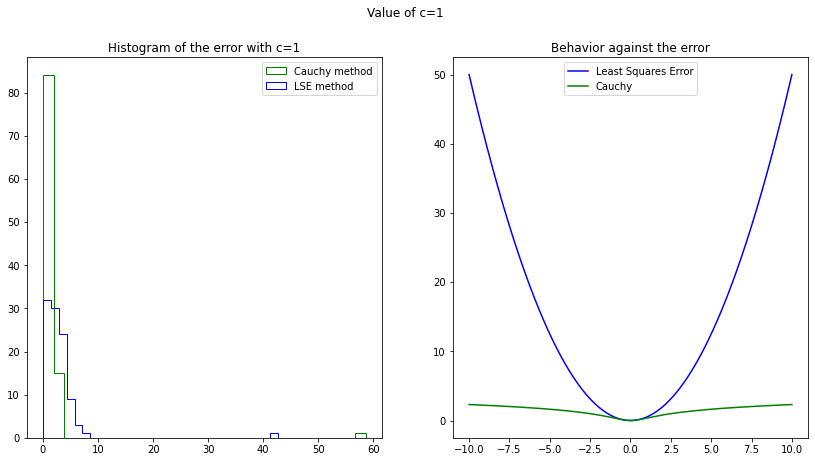

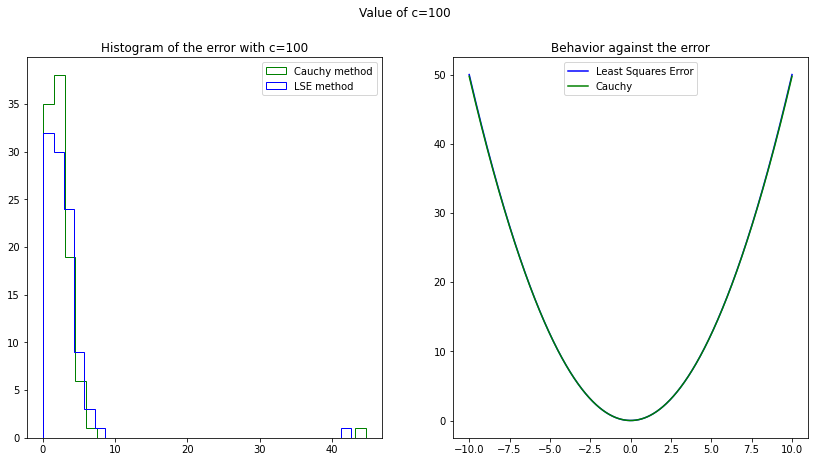

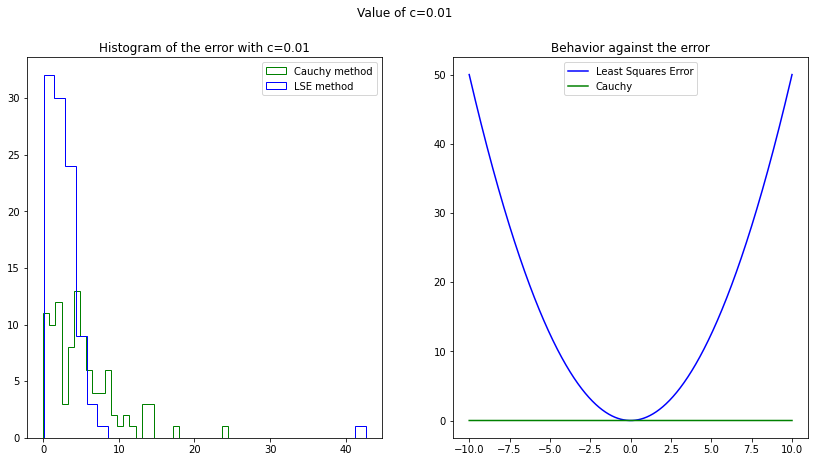

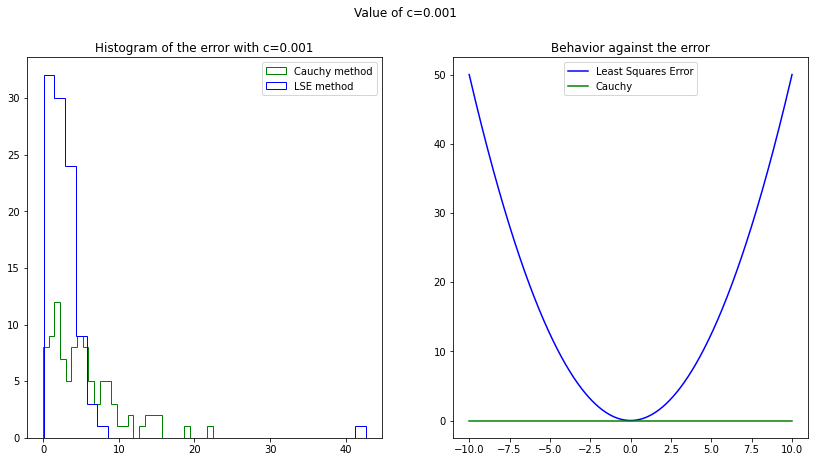

In [114]:
c = [1, 100, 1/100, 1/1000]         

weights = np.zeros([2,len(c)])      # Initiate a matrix to store the obtained weights of the methods

for i in range(0, len(c)):
  wk, k = grad_des_Cauchy(X[:,[1]], Y[:,[1]], c=c[i])
  wkLSE, kLSE = grad_des_LSE(X[:,[1]], Y[:,[1]])
  
  weights[0,i] = wk[0,-1]           # Store the weights of the methods, these will later be used
  weights[1,i] = wk[1,-1]

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
  fig.suptitle("Value of c=" + str(c[i]))
  ax1.hist(np.abs(wk[0,-1]*X[:,[1]]+wk[1,-1] - Y[:,[1]]), bins=30, color='g', histtype='step', label='Cauchy method')
  ax1.hist(np.abs(wkLSE[0,-1]*X[:,[1]]+wkLSE[1,-1] - Y[:,[1]]), bins=30, color='b', histtype='step', label='LSE method')
  ax1.set_title("Histogram of the error with c=" + str(c[i]))
  ax1.legend()

  # Generate points to plot the functions against the error --------------------
  ulim = 10
  u = np.linspace(-ulim, ulim, 1000)

  # Plot the functions ---------------------------------------------------------
  ax2.plot(u, LSE_aux(u), c='b')
  ax2.plot(u, Cauchy_aux(u, c[i]), c='g')
  ax2.set_title("Behavior against the error")
  ax2.legend(['Least Squares Error', 'Cauchy'])

OBSERVATION: From the plots it is clear how the different values of c allow for a different weight on the function from the errors given by the outliers. As we can see, the error given by the outlier is larger in some functions than others, meaning for those values of c the outlier will be more 'ignored' and allowed to not be fitted by the regression like the other points in the distribution

Let's compare more in detail the histograms of the Cauchy regresions with for different values of c

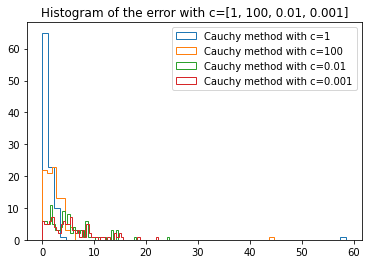

In [145]:
for i in range(0, len(c)):
  wk, k = grad_des_Cauchy(X[:,[1]], Y[:,[1]], c=c[i])
  wkLSE, kLSE = grad_des_LSE(X[:,[1]], Y[:,[1]])

  labeli = 'Cauchy method with c=' + str(c[i])
  plt.hist(np.abs(wk[0,-1]*X[:,[1]]+wk[1,-1] - Y[:,[1]]), bins=50, histtype='step', label=labeli)

plt.title("Histogram of the error with c=[1, 100, 0.01, 0.001]")
plt.legend()

As suggested, let's plot the functions with different values of c, closer to the smaller values of the error. We do this in order to understand how they behave for smaller values and which ones have a quadratic profile

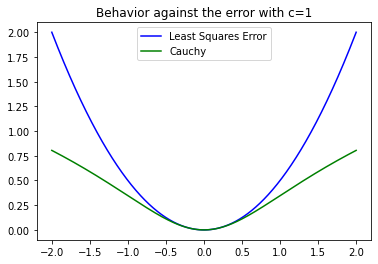

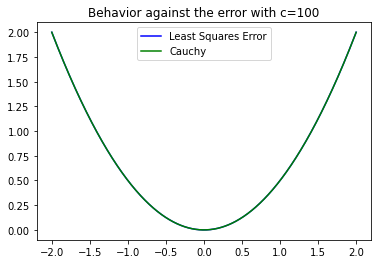

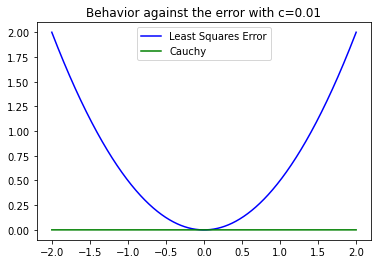

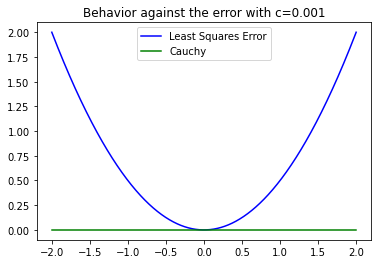

In [146]:
for i in range(0, len(c)):  
  # Generate points to plot the functions against the error --------------------
  ulim = 2
  u = np.linspace(-ulim, ulim, 1000)

  # Plot the functions ---------------------------------------------------------
  plt.figure()
  plt.plot(u, LSE_aux(u), c='b')
  plt.plot(u, Cauchy_aux(u, c[i]), c='g')
  plt.title("Behavior against the error with c=" + str(c[i]))
  plt.legend(['Least Squares Error', 'Cauchy'])

From these plots we can observe how the Cauchy function with c=1 is almost quadratic for values close to zero, while for c=100 the behaviour is remarkably close to quadratic, almost identical. 

Usually, the values considered as outliers are the values that fall further than 1.5 times the interquartile range (the distance between the first and the thirs quartile, Q1 and Q3). However, an outlier is simply a value that falls out of a distribution due to some error; for this reason there is not a unique way to classify/compute/recognise them. In our case, it would be appropriate to consider a value as an outlier when it has a disproportionate weight on the loss function considered. Meaning that a value coudl be considered as an outlier when it falls outside the range in which the loss function behaves in a certain desired way.

## Robust functions - part 6

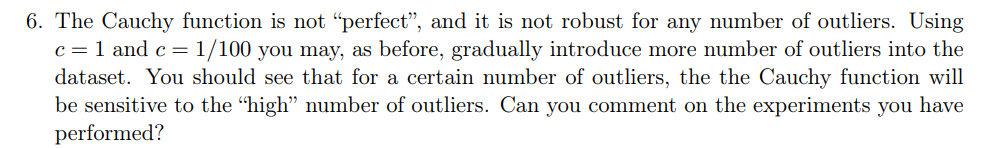

Let's now focus on two values of c: c=1 and c=1/100

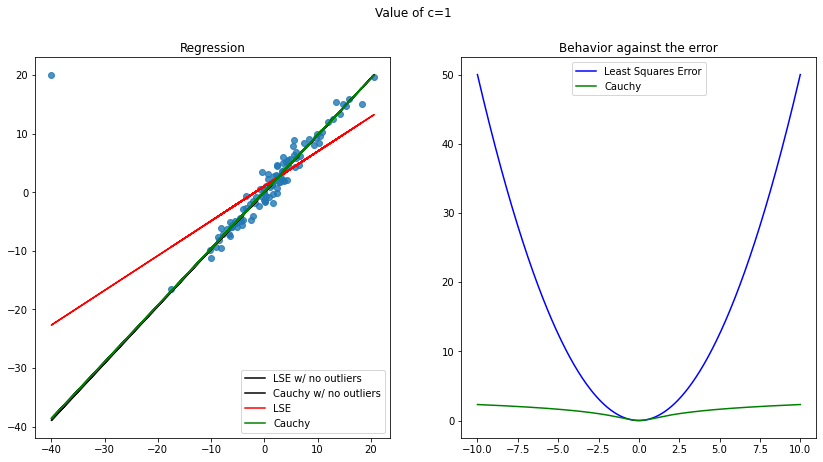

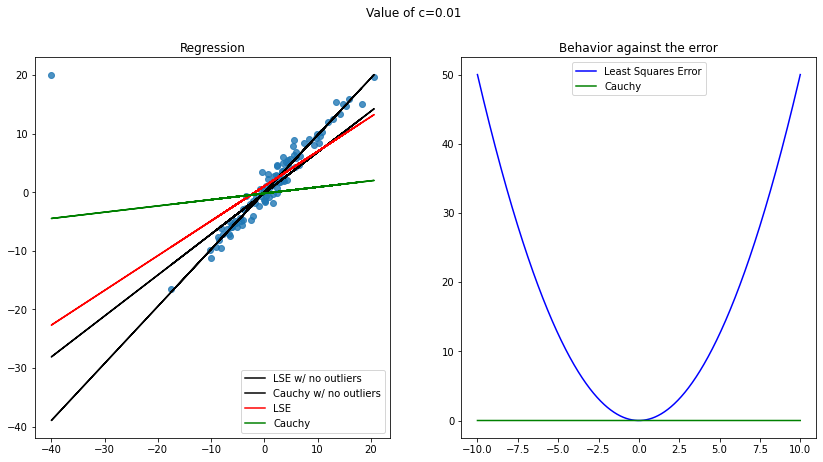

In [117]:
# Plot the obtained regression with different values of c and with one outlier -
c = [1,1/100]    

for i in range(0, len(c)):
# Run the method on the dataset with no outliers -----------------------------
  wk1_no, k1_no = grad_des_LSE(X[:,[0]], Y[:,[0]])
  wk2_no, k2_no = grad_des_Cauchy(X[:,[0]], Y[:,[0]], c=c[i])

  # Run the method on  the dataset with one outlier ----------------------------
  w0 = np.zeros([2,1])     # Initialize the weights
  wk1, k1 = grad_des_LSE(X[:,[1]], Y[:,[1]])
  wk2, k2 = grad_des_Cauchy(X[:,[1]], Y[:,[1]], c=c[i])

  # Plot the obtained regression -----------------------------------------------
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
  fig.suptitle("Value of c=" + str(c[i]))
  ax1.scatter(X[:,[1]], Y[:,[1]], alpha=0.8)
  ax1.plot(X[:,[1]], wk1_no[0,-1]*X[:,[1]]+wk1_no[1,-1], c='k', label='LSE w/ no outliers')
  ax1.plot(X[:,[1]], wk2_no[0,-1]*X[:,[1]]+wk2_no[1,-1], c='k', label='Cauchy w/ no outliers')
  ax1.plot(X[:,[1]], wk1[0,-1]*X[:,[1]]+wk1[1,-1], c='r', label='LSE')
  ax1.plot(X[:,[1]], wk2[0,-1]*X[:,[1]]+wk2[1,-1], c='g', label='Cauchy')
  ax1.legend()
  ax1.set_title("Regression")

  # Generate points to plot the functions against the error --------------------
  ulim = 10
  u = np.linspace(-ulim, ulim, 1000)

  # Plot the functions ---------------------------------------------------------
  ax2.plot(u, LSE_aux(u), c='b')
  ax2.plot(u, Cauchy_aux(u, c[i]), c='g')
  ax2.legend(['Least Squares Error', 'Cauchy'])
  ax2.set_title("Behavior against the error")

OBSERVATION: at first sight, the two values gave better linear regressions than the one obatined with the least squares method. Both of the regression improve the result compared to the regression obtained using LSE, as one would expect considering that the plots of the behaviour of the two Cauchy functions against the error show they are less sensible to larger values, compared to the behavior of the LSE function

We will now study the performance of the two methods when more outliers are present. To do so, for a less clustered visualization, in the following sections we will not consider the linear regressions obtained with the least squares method

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


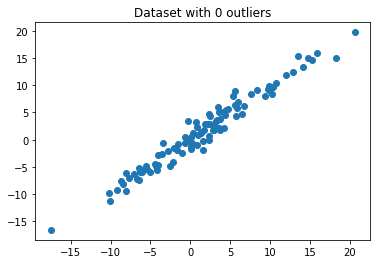

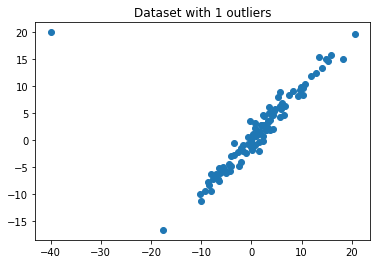

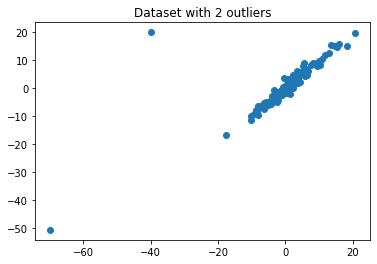

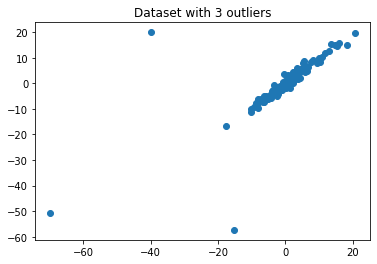

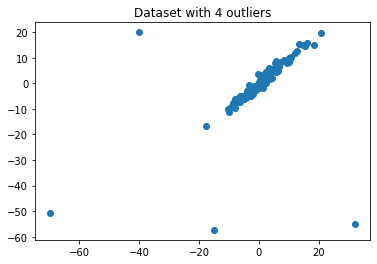

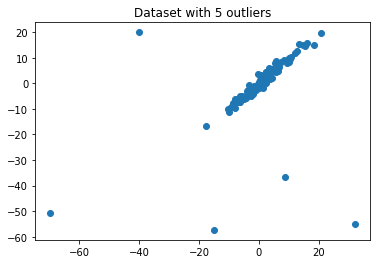

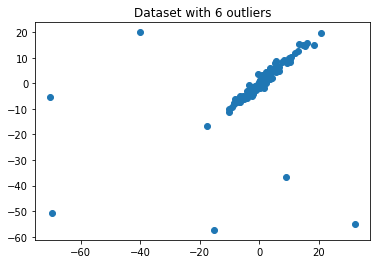

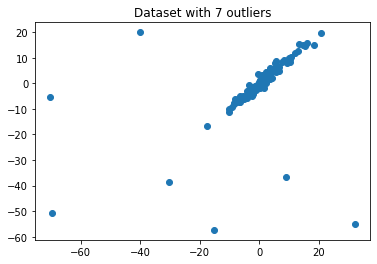

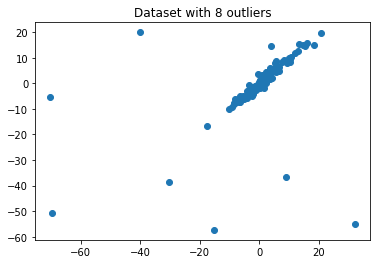

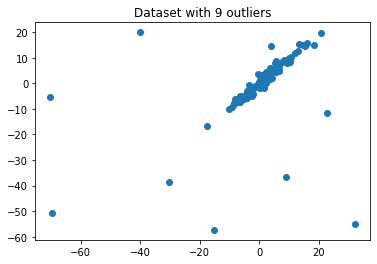

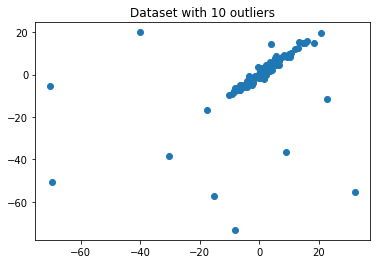

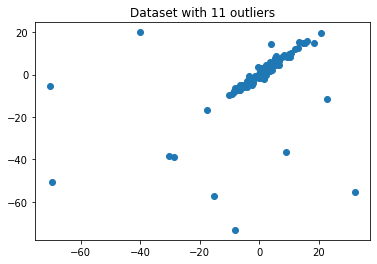

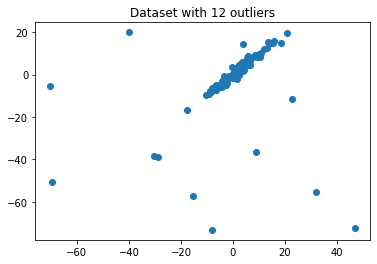

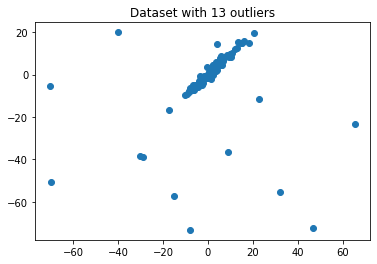

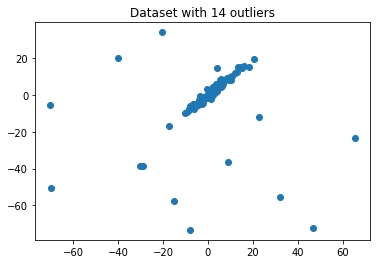

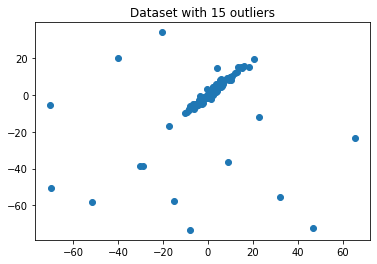

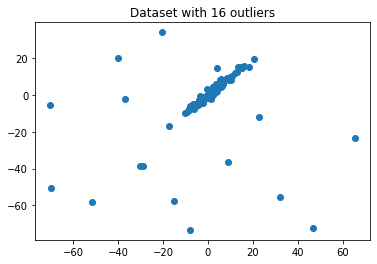

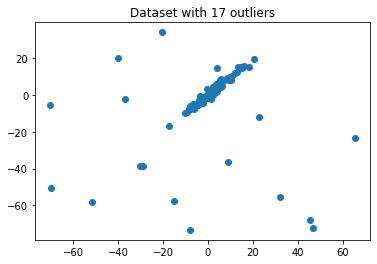

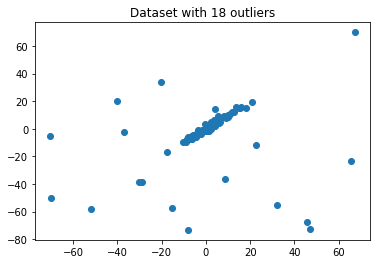

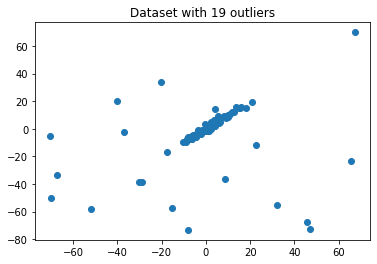

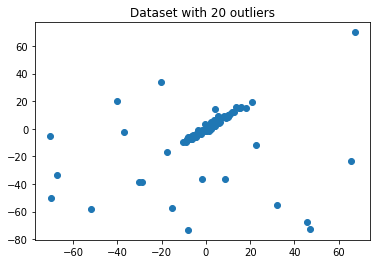

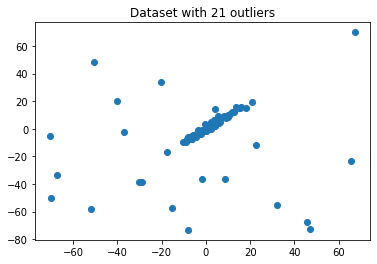

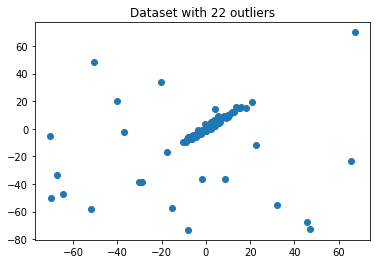

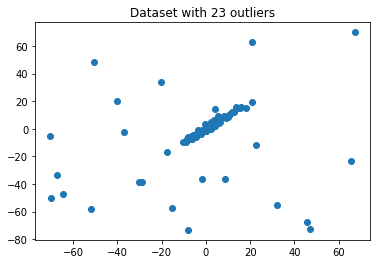

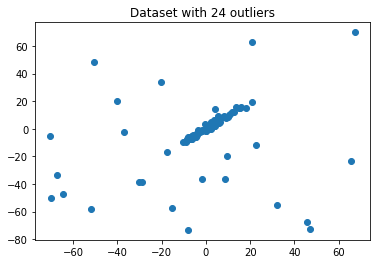

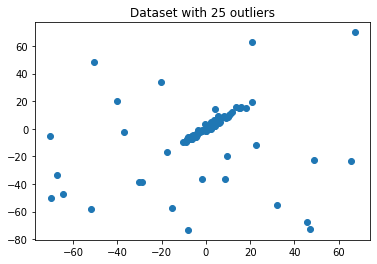

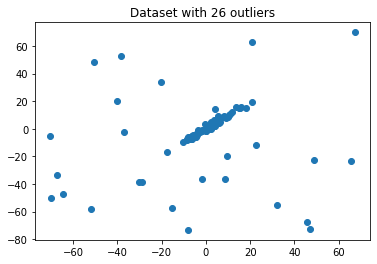

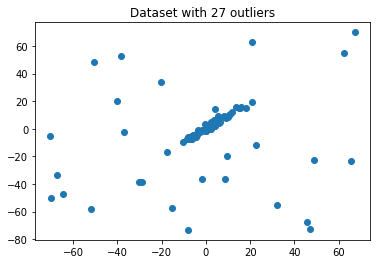

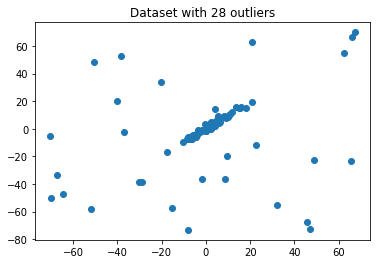

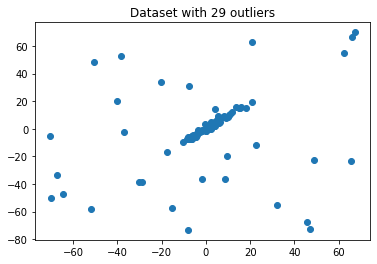

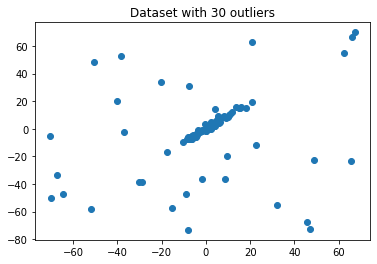

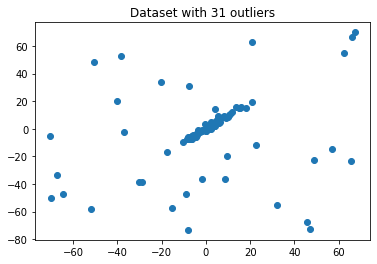

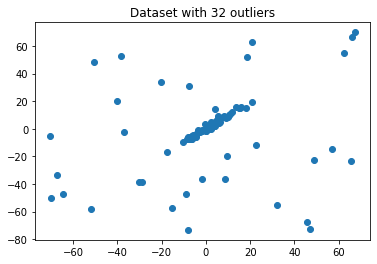

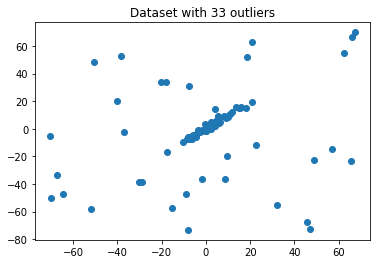

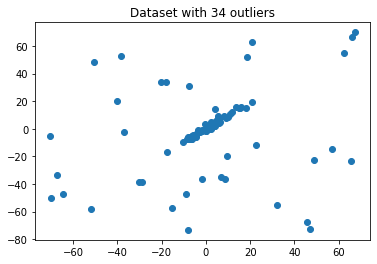

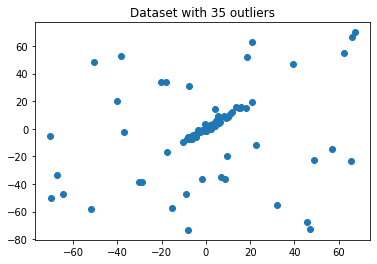

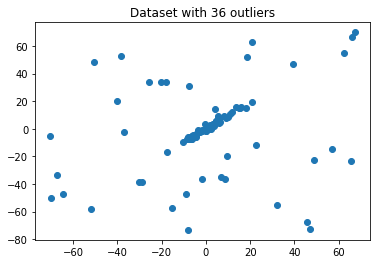

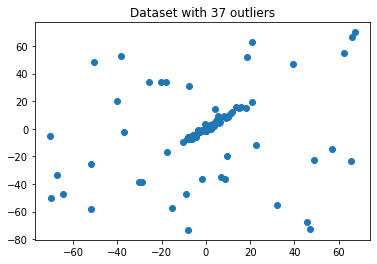

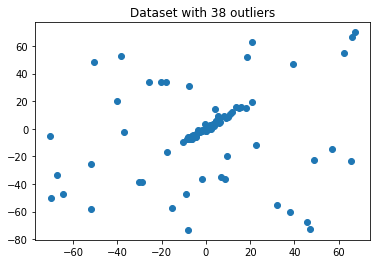

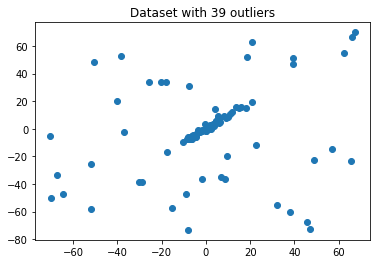

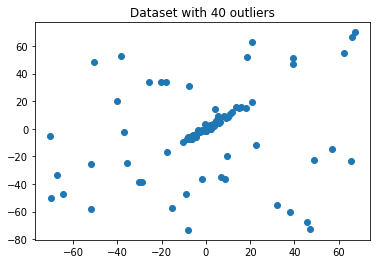

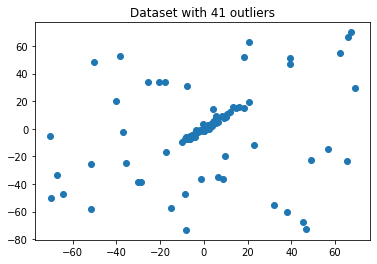

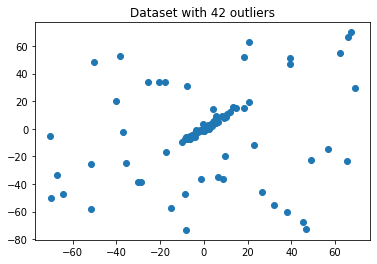

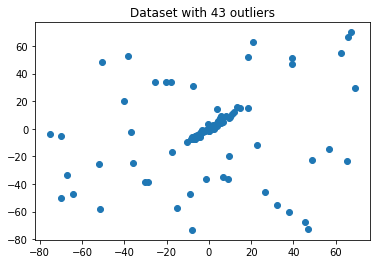

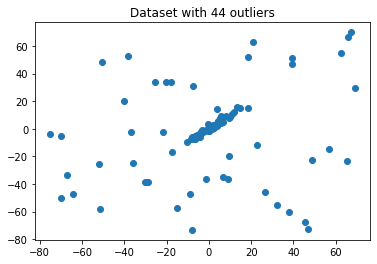

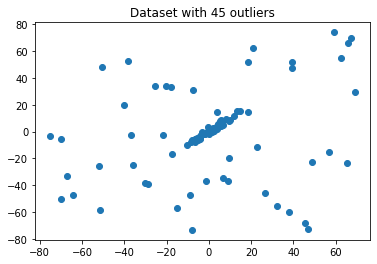

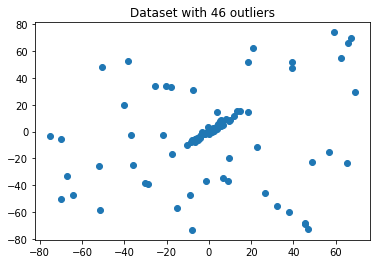

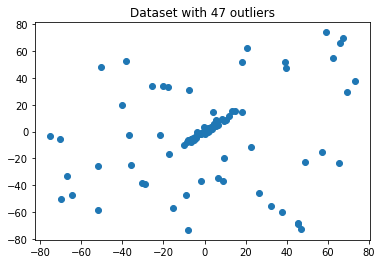

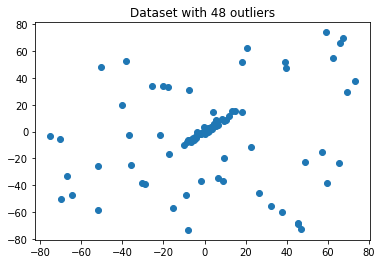

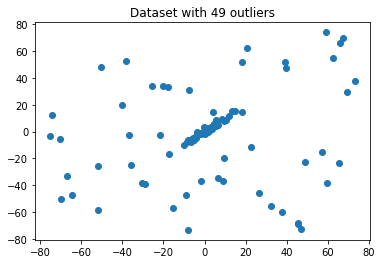

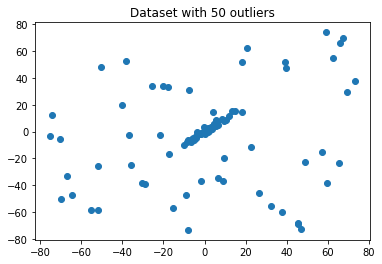

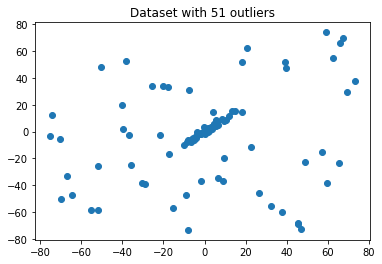

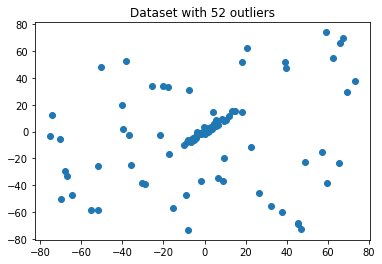

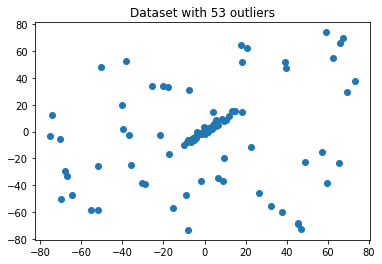

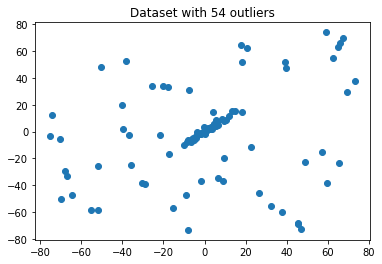

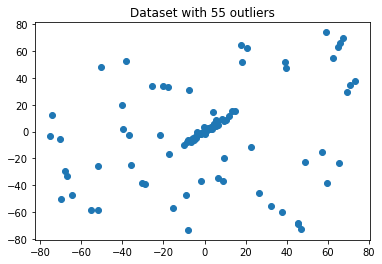

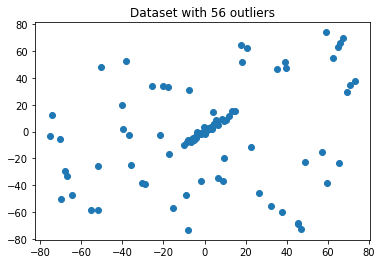

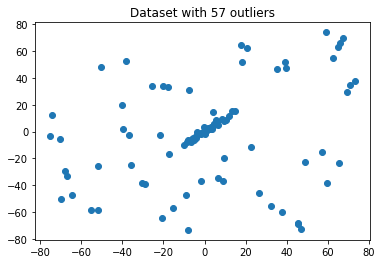

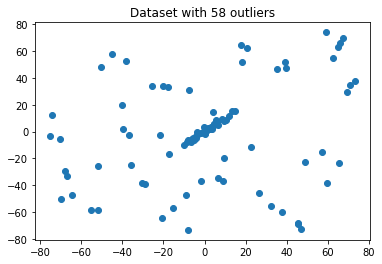

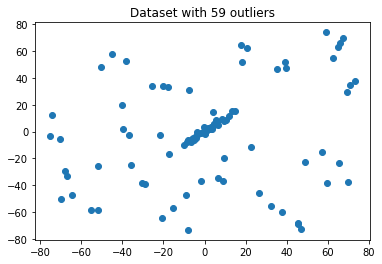

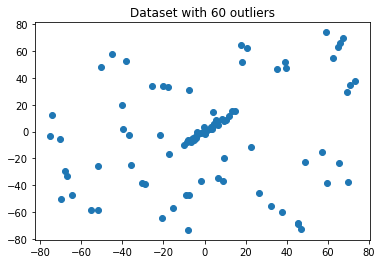

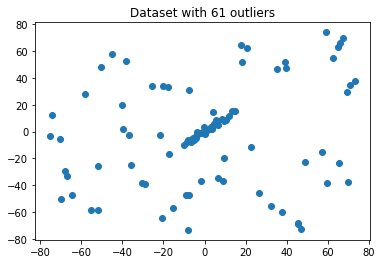

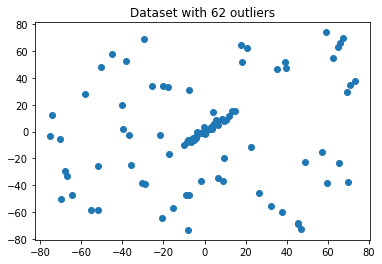

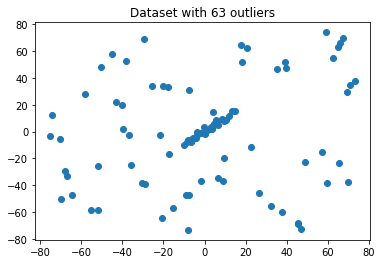

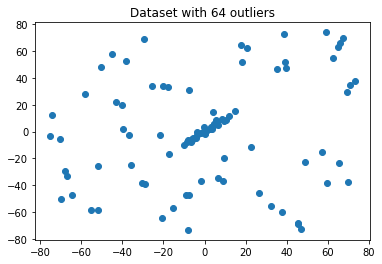

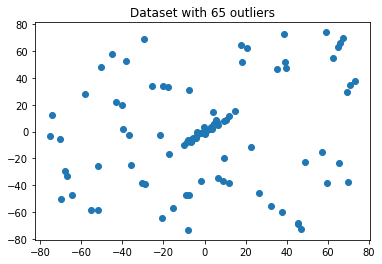

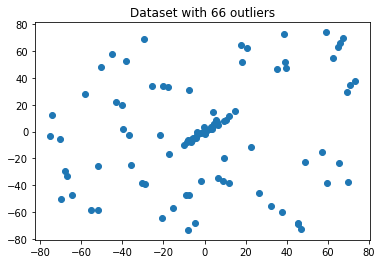

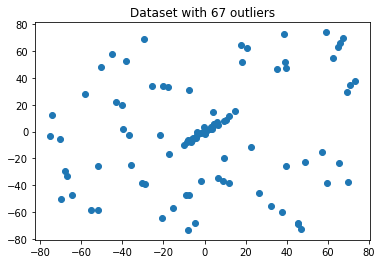

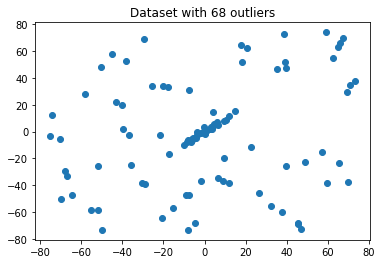

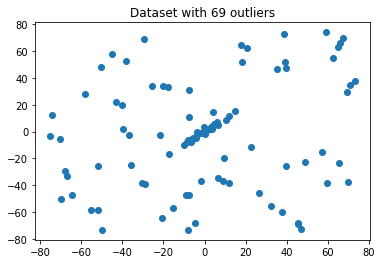

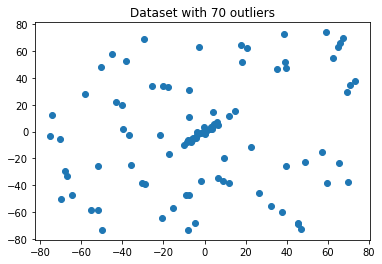

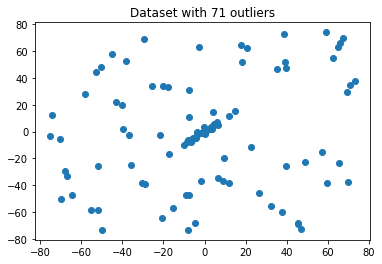

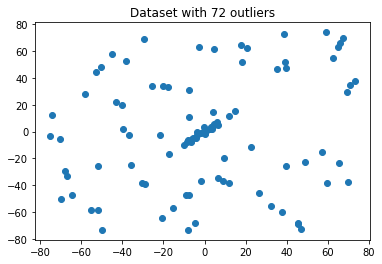

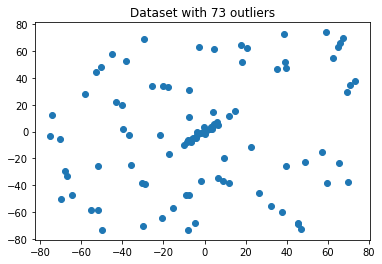

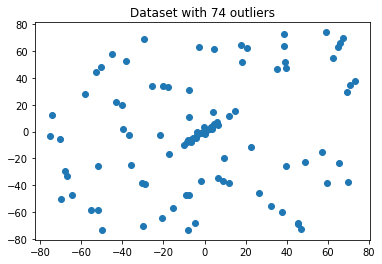

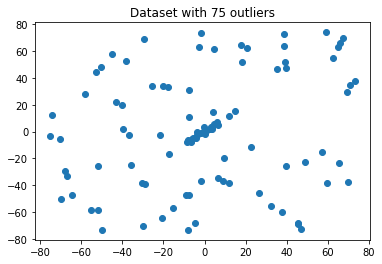

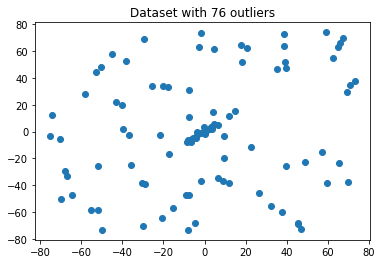

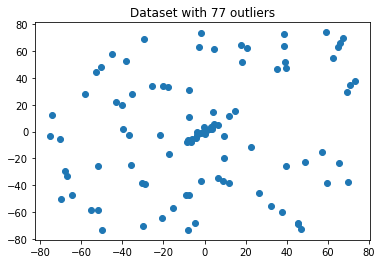

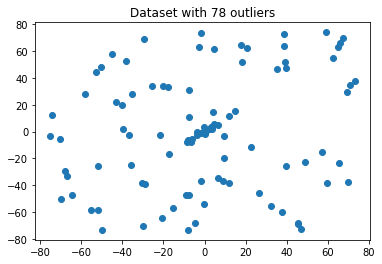

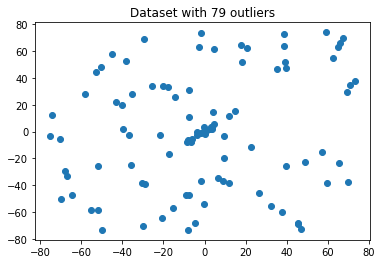

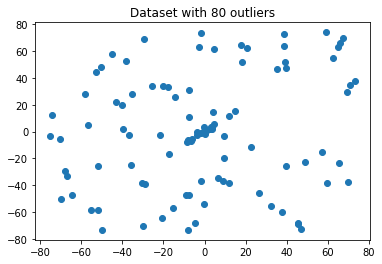

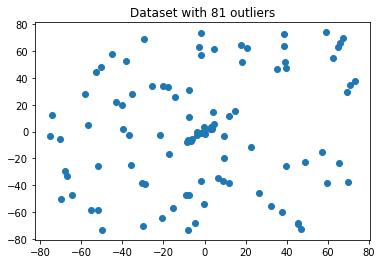

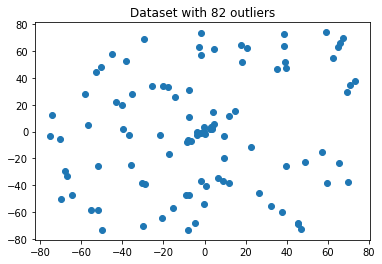

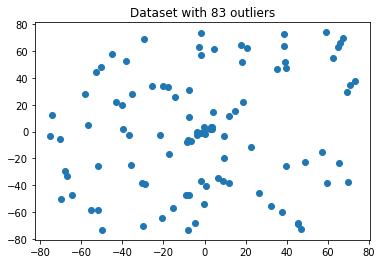

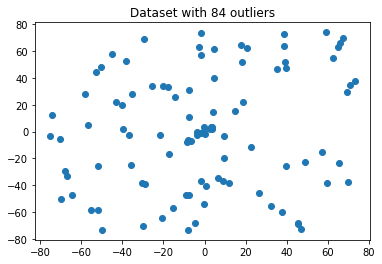

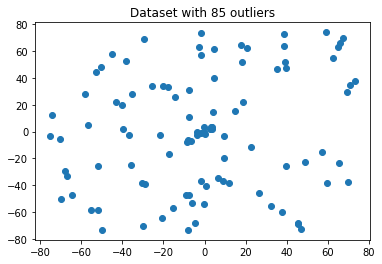

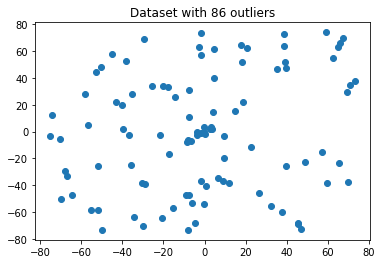

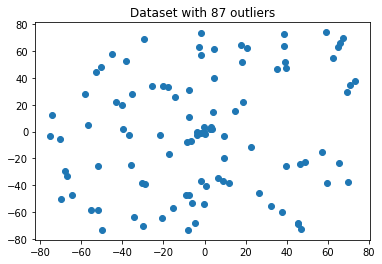

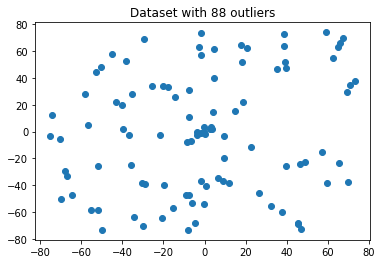

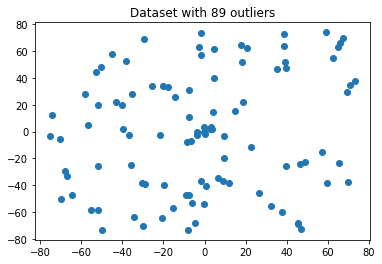

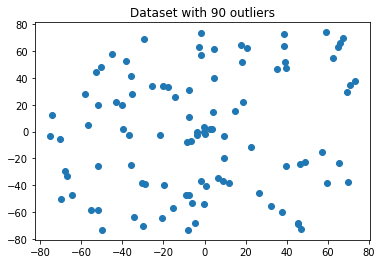

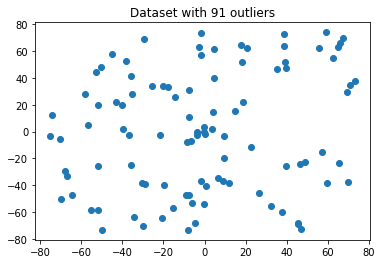

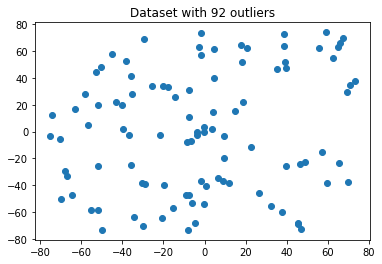

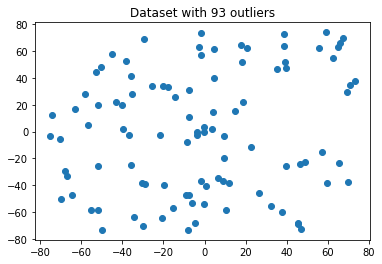

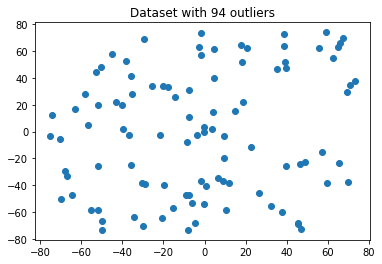

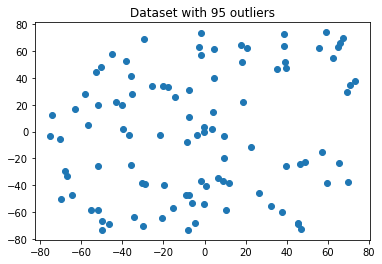

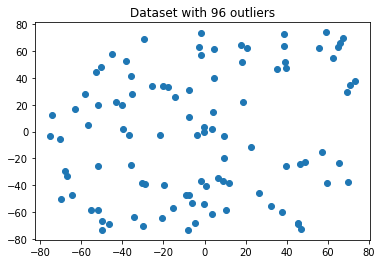

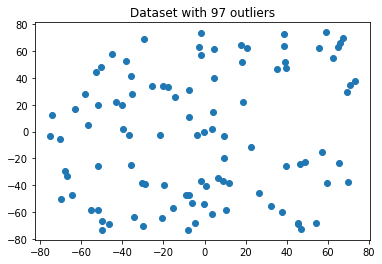

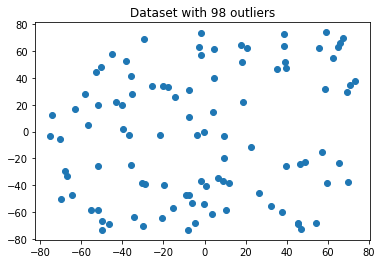

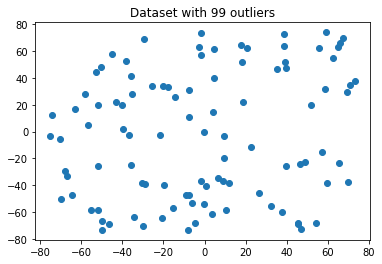

In [129]:
# Visualize the datasets with more outliers ------------------------------------
for j in range(0, X.shape[1]):
  plt.figure()
  plt.scatter(X[:,[j]], Y[:,[j]])
  plt.title("Dataset with " + str(j) + " outliers")

**DISCLAIMER: Run this following block only in case of need: it's time demanding to compute. It is repeated after these blocks including a stop condition on the number of iterations, which takes considerably less time**

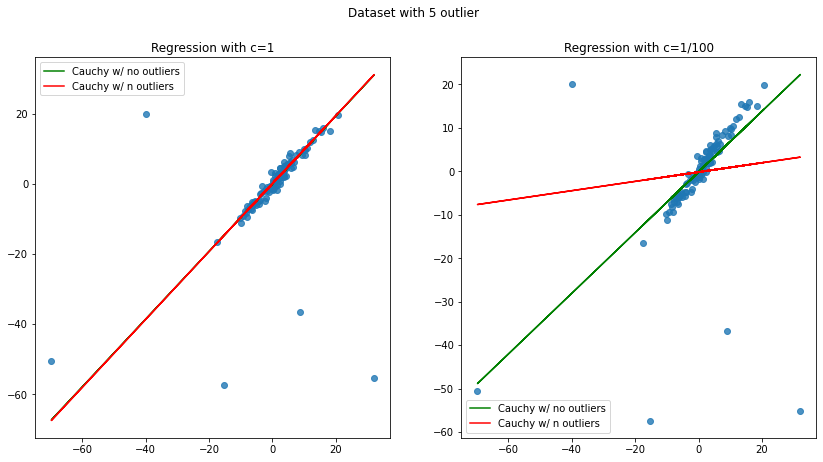

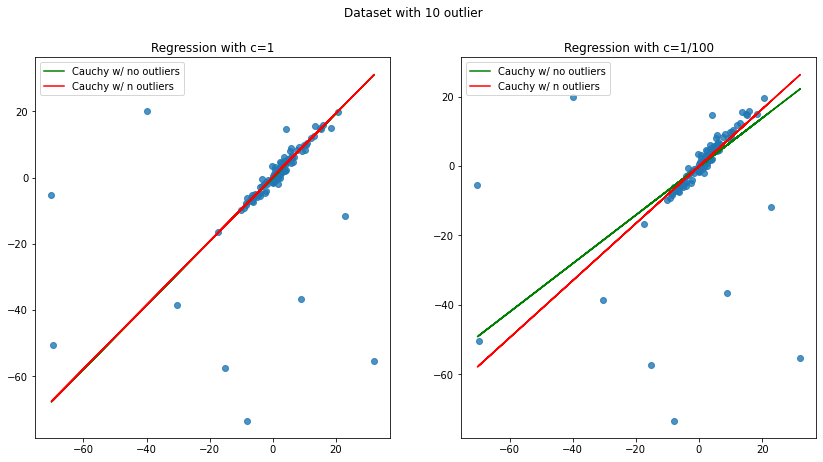

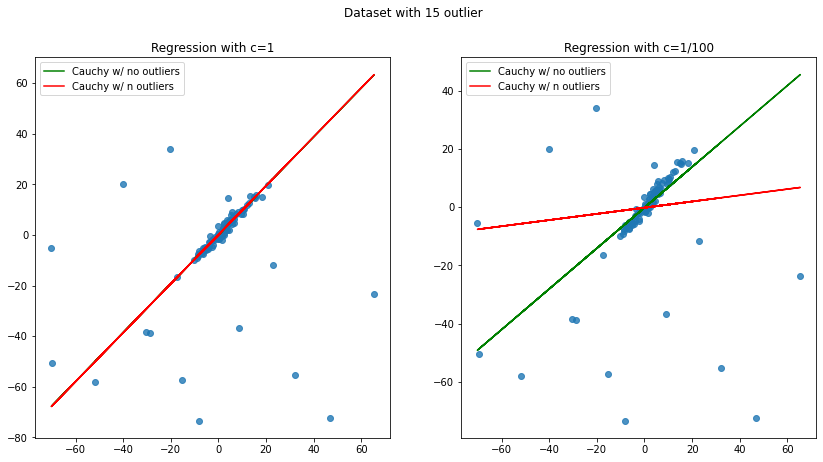

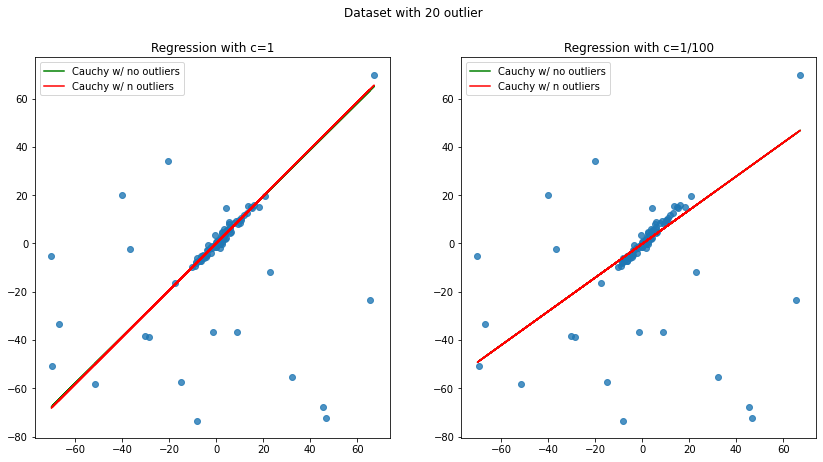

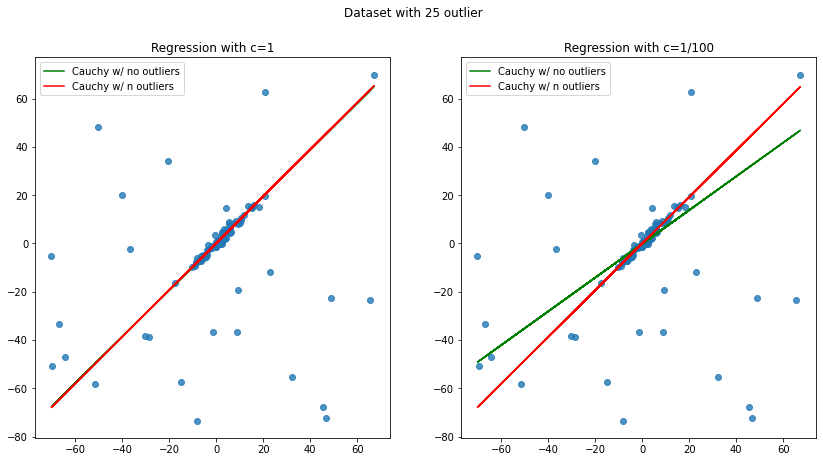

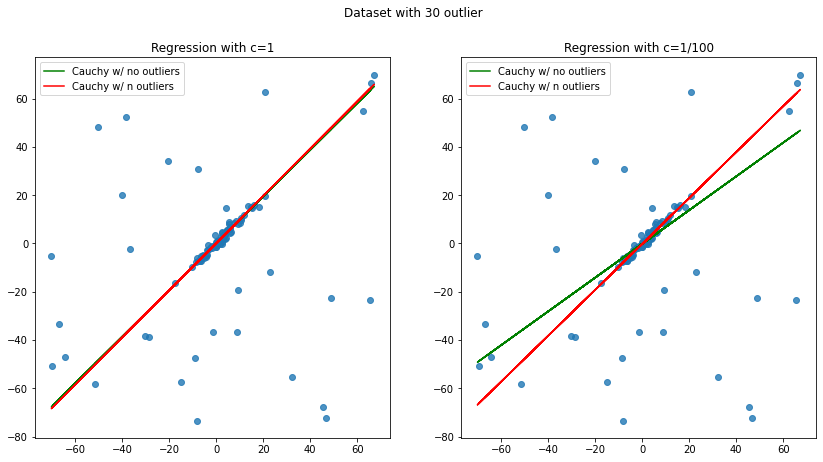

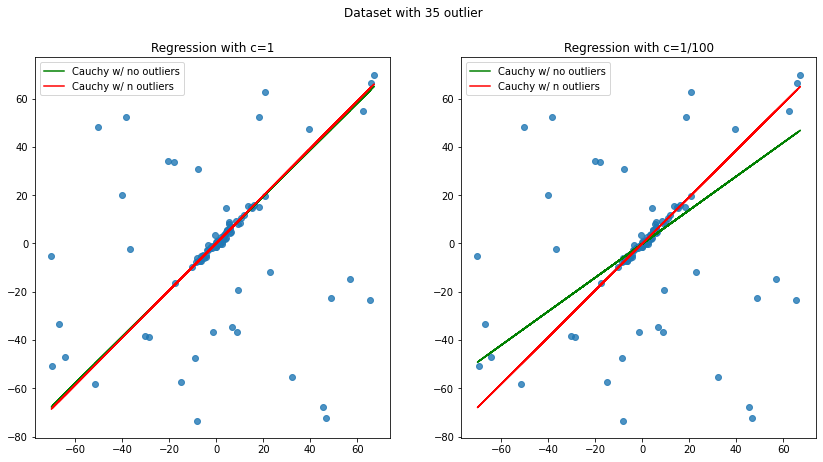

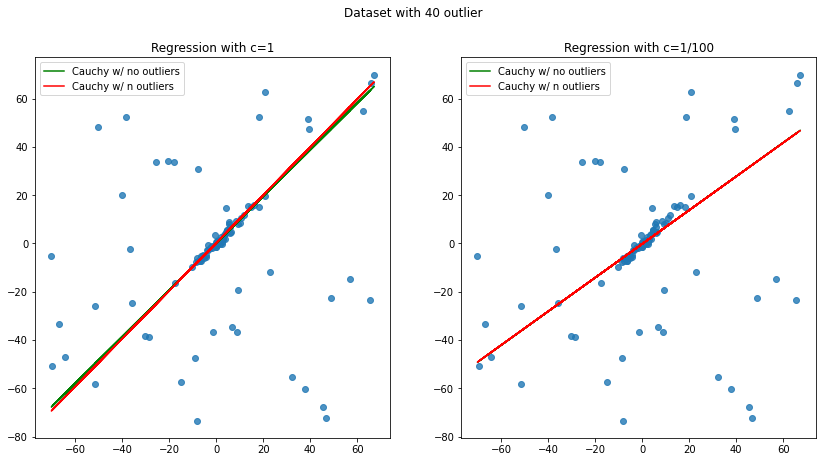

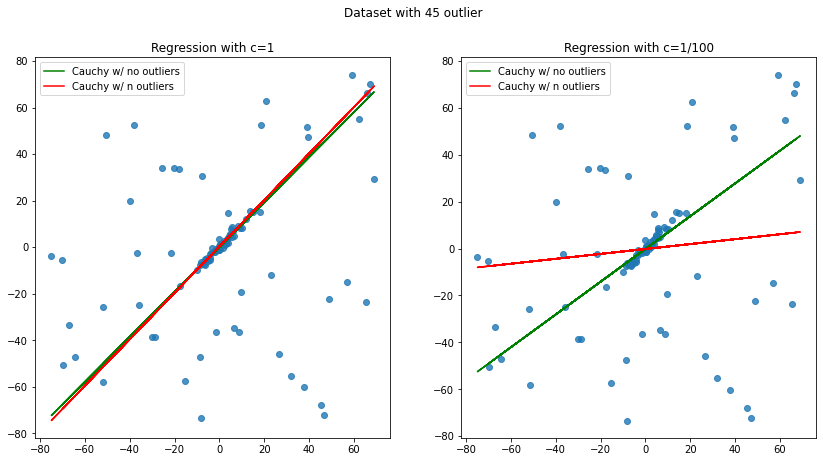

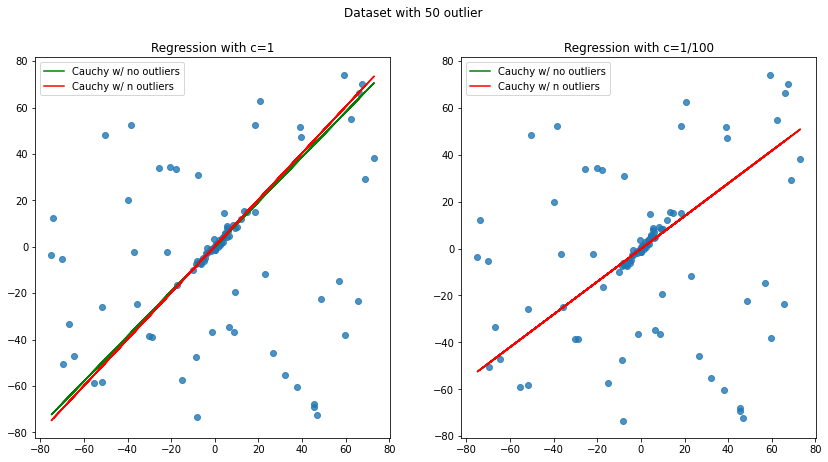

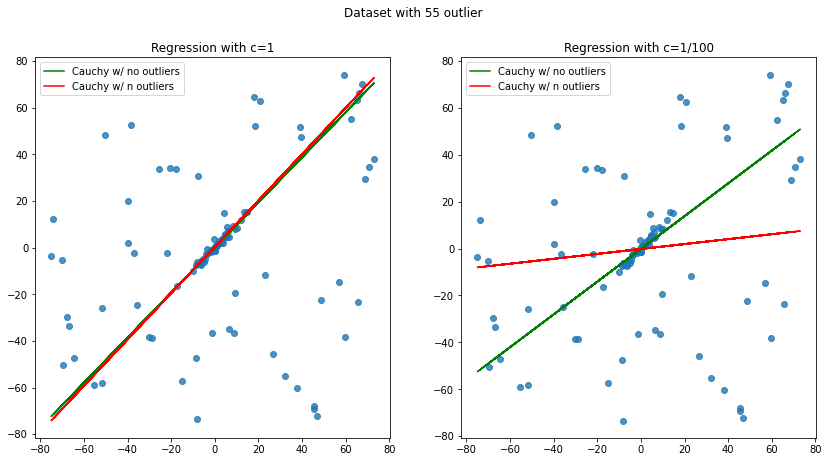

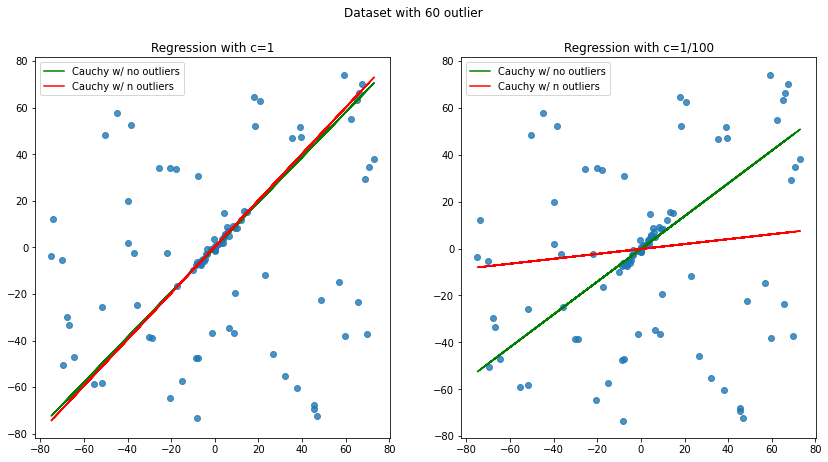

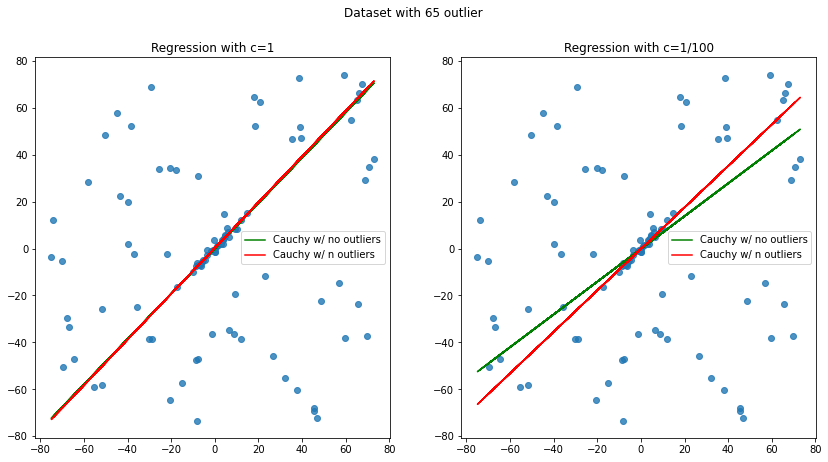

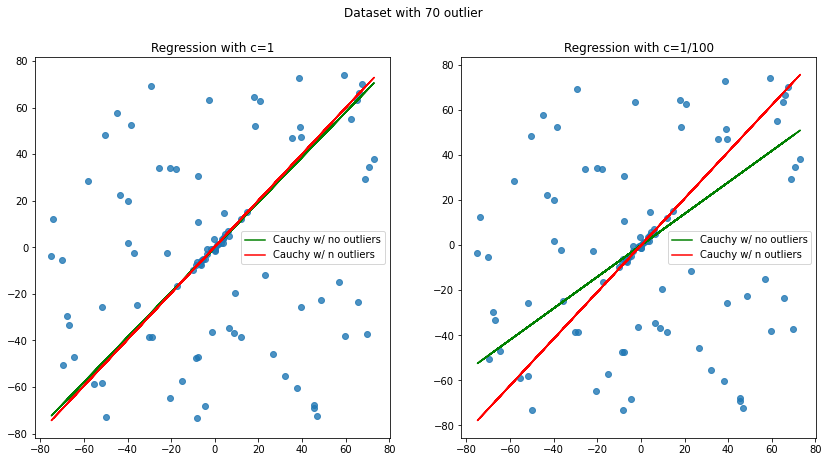

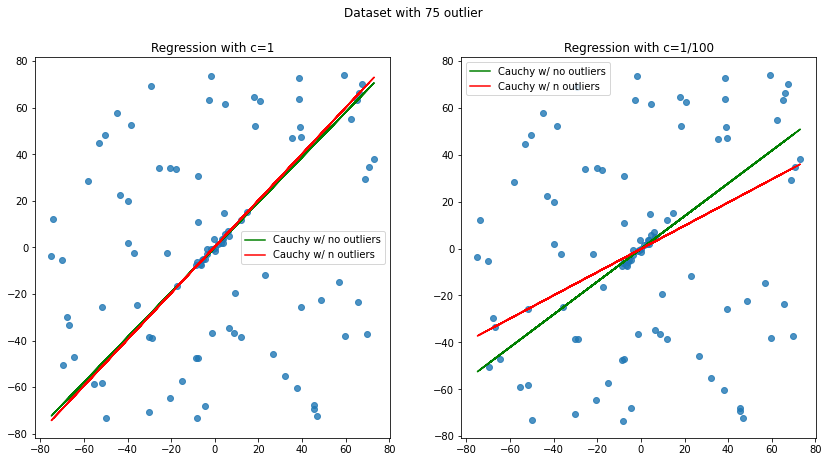

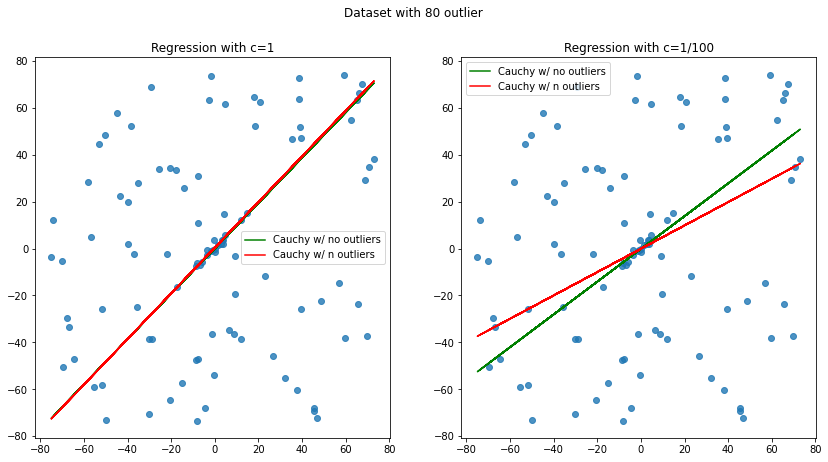

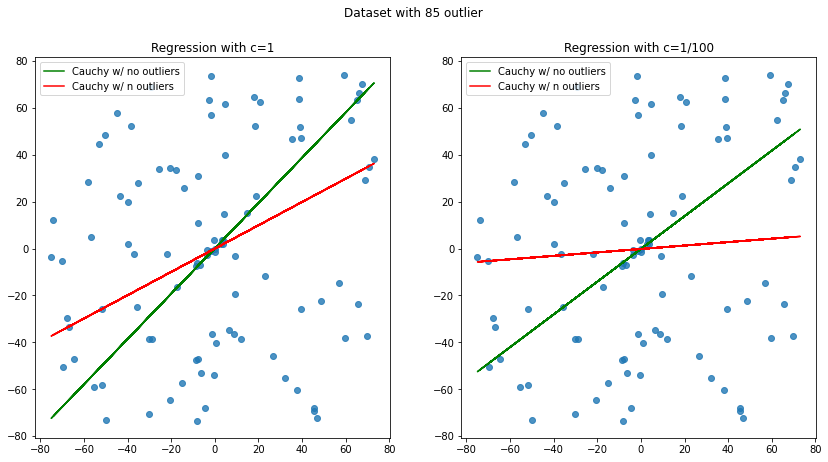

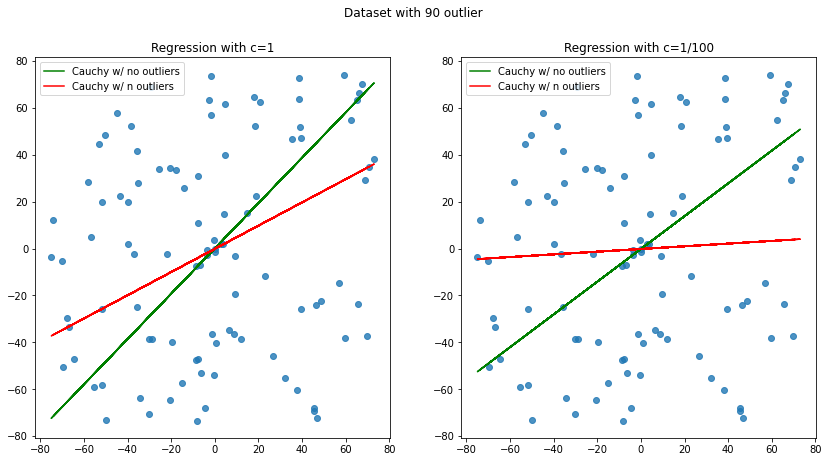

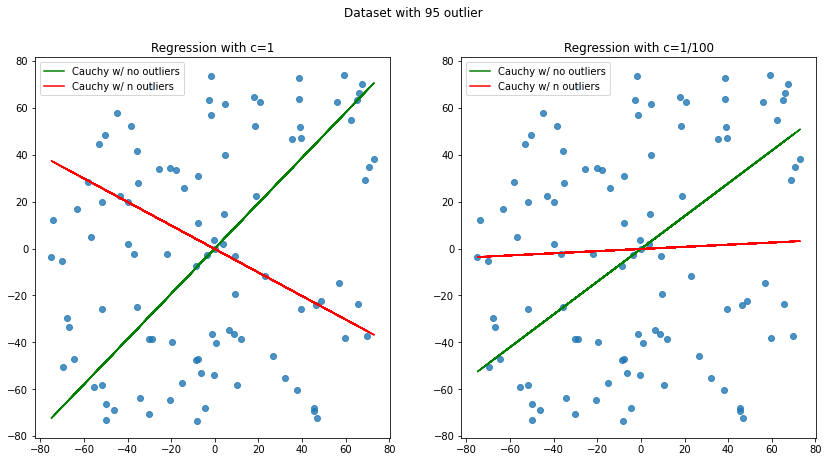

In [127]:
# Plot the obtained regression with different values of c and with one outlier -
c = [1,1/100]    
t = 5

for j in range(1, int(X.shape[1]/t)):
  # Run the method with c[i] and no outliers -----------------------------------
  wk1_no, k1_no = grad_des_Cauchy(X[:,[0]], Y[:,[0]], c=c[0])
  wk2_no, k2_no = grad_des_Cauchy(X[:,[0]], Y[:,[0]], c=c[1])

  # Run the method with c[i] and j outliers ----------------------------------
  wk1, k1 = grad_des_Cauchy(X[:,[j*t]], Y[:,[j*t]], c=c[0])
  wk2, k2 = grad_des_Cauchy(X[:,[j*t]], Y[:,[j*t]], c=c[1])

  # Plot the obtained regression ---------------------------------------------
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
  fig.suptitle("Dataset with " + str(j*t) + " outlier")
  ax1.scatter(X[:,[j*t]], Y[:,[j*t]], alpha=0.8)
  ax1.plot(X[:,[j*t]], wk1_no[0,-1]*X[:,[j*t]]+wk1_no[1,-1], c='g', label='Cauchy w/ no outliers')
  ax1.plot(X[:,[j*t]], wk1[0,-1]*X[:,[j*t]]+wk1[1,-1], c='r', label='Cauchy w/ n outliers')
  ax1.legend()
  ax1.set_title("Regression with c=1")

  # Plot the obtained regression -----------------------------------------------
  ax2.scatter(X[:,[j*t]], Y[:,[j*t]], alpha=0.8)
  ax2.plot(X[:,[j*t]], wk2_no[0,-1]*X[:,[j*t]]+wk2_no[1,-1], c='g', label='Cauchy w/ no outliers')
  ax2.plot(X[:,[j*t]], wk2[0,-1]*X[:,[j*t]]+wk2[1,-1], c='r', label='Cauchy w/ n outliers')
  ax2.legend()
  ax2.set_title("Regression with c=1/100")

OBSERVATIONS: 


*   With c=1 the obtained regression manages to be pretty robust with the increasing number of outliers. The method manages to give a good result until a number of outliers of around 80/85. However, with this dataset, when the number of outliers reaches 85 the method does not reach a regression that approximates well the original distribution. **The result is very good, but we need to consider that the way we are generating the outliers is random noise. If the outliers were due to systematical error, they would possibly be heavily skewed on one side of the distribution, thus making it more difficult for the function to give a good regression**
*  With c=1/100 we have a rather unpredictable behavior. It is often giving bad results even with a low number of outliers present in the dataset. This makes it not nearly as robust as the Cauchy function with a value of c=1



Lastly, in the following section we observe the resulting regression for all the possible values of outliers

**DISCLAIMER: Run this following block only in case of need: it's time demanding to compute. It is repeated after these blocks including a stop condition on the number of iterations, which takes considerably less time** </br>
**PS: Ignore the warning given, it is only a memory usage warning**

In [128]:
# Plot the obtained regression with different values of c and with one outlier -
c = [1,1/100]    

for j in range(0, X.shape[1]):
  # Run the method with c[i] and no outliers -----------------------------------
  wk1_no, k1_no = grad_des_Cauchy(X[:,[0]], Y[:,[0]], c=c[0])
  wk2_no, k2_no = grad_des_Cauchy(X[:,[0]], Y[:,[0]], c=c[1])

  # Run the method with c[i] and j outliers ----------------------------------
  wk1, k1 = grad_des_Cauchy(X[:,[j]], Y[:,[j]], c=c[0])
  wk2, k2 = grad_des_Cauchy(X[:,[j]], Y[:,[j]], c=c[1])

  # Plot the obtained regression ---------------------------------------------
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
  fig.suptitle("Dataset with " + str(j) + " outlier")
  ax1.scatter(X[:,[j]], Y[:,[j]], alpha=0.8)
  ax1.plot(X[:,[j]], wk1_no[0,-1]*X[:,[j]]+wk1_no[1,-1], c='g', label='Cauchy w/ no outliers')
  ax1.plot(X[:,[j]], wk1[0,-1]*X[:,[j]]+wk1[1,-1], c='r', label='Cauchy w/ n outliers')
  ax1.legend()
  ax1.set_title("Regression with c=1")

  # Plot the obtained regression -----------------------------------------------
  ax2.scatter(X[:,[j]], Y[:,[j]], alpha=0.8)
  ax2.plot(X[:,[j]], wk2_no[0,-1]*X[:,[j]]+wk2_no[1,-1], c='g', label='Cauchy w/ no outliers')
  ax2.plot(X[:,[j]], wk2[0,-1]*X[:,[j]]+wk2[1,-1], c='r', label='Cauchy w/ n outliers')
  ax2.legend()
  ax2.set_title("Regression with c=1/100")

Output hidden; open in https://colab.research.google.com to view.